<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

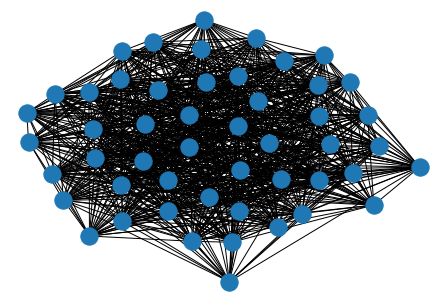

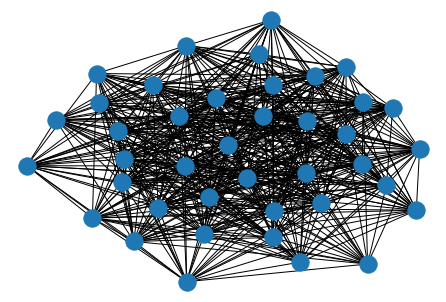

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .7 #Probabibilty for Node Connection in random graph
PP = .7
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 ... 0 0 1]
 [1 0 1 ... 0 1 1]
 [1 1 0 ... 1 1 0]
 ...
 [0 0 1 ... 0 1 1]
 [0 1 1 ... 1 0 1]
 [1 1 0 ... 1 1 0]]
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 1 1]
 [0 1 0 ... 1 1 1]
 ...
 [1 0 1 ... 0 0 0]
 [0 1 1 ... 0 0 1]
 [0 1 1 ... 0 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=(1/(Node[cur][2]['I'] + N/5))
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=(1/(Node[cur][2]['I'] + NN/10))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            Node_next[nex][0]['Viral_load']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673]
[215, 563, 930, 1138, 1200, 1211, 1218, 1020, 695, 346, 148, 94, 89, 88, 75, 56, 39, 30, 22, 16, 10, 7, 4, 5, 7, 9, 11, 11, 10, 9, 7, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 563, 930, 1138, 1200, 1211, 1218, 1235, 1258, 1276, 1286, 1294, 1300, 1306, 1310, 1314, 1315, 1316, 1316, 1316, 1316, 1317, 1318, 1320, 1323, 1325, 1327]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673]]
[[], [215, 563, 930, 1138, 1200, 1211, 1218, 1020, 695, 346, 148, 94, 89, 88, 75, 56, 39, 30, 22, 16, 10, 7, 4, 5, 7, 9, 11, 11, 10, 9, 7, 4, 2, 0]]
[[], [0, 0, 0, 0, 0, 0, 0, 215, 563, 930, 1138, 1200, 1211, 1218, 1235, 1258, 1276, 1286, 1294, 1300, 1306, 131

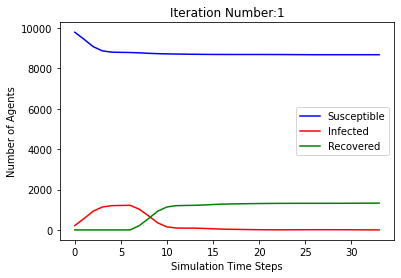

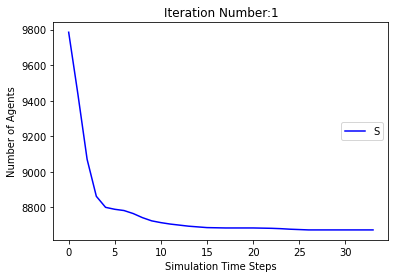

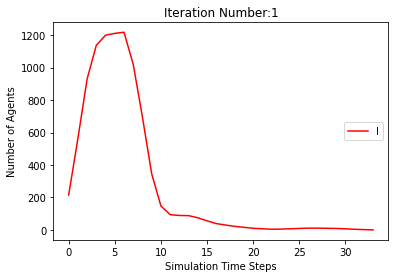

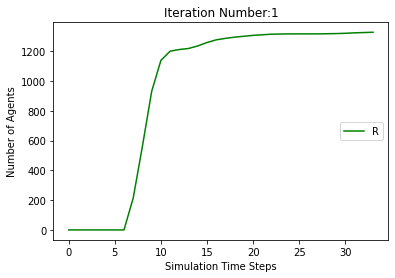

[9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677]
[215, 565, 964, 1141, 1198, 1220, 1233, 1040, 705, 318, 149, 105, 96, 84, 62, 49, 37, 29, 20, 7, 6, 6, 4, 4, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 565, 964, 1141, 1198, 1220, 1233, 1255, 1270, 1282, 1290, 1303, 1316, 1317, 1317, 1319, 1319, 1319, 1323]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677]]
[[], [215, 563, 930, 1138, 1200, 1211, 1218, 1020, 695, 346, 148, 94, 89, 88, 75, 56, 39, 30, 22, 16, 10, 7, 4, 5, 7, 9, 11, 11, 10, 9, 7, 4, 2, 0], [215, 565, 964, 1141, 1198, 1220, 1233, 1040, 705, 318, 149, 105, 96, 84, 62,

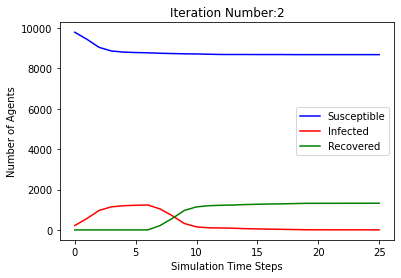

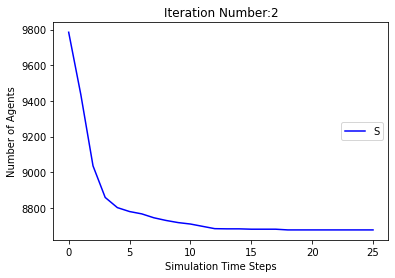

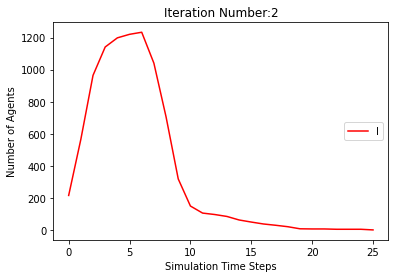

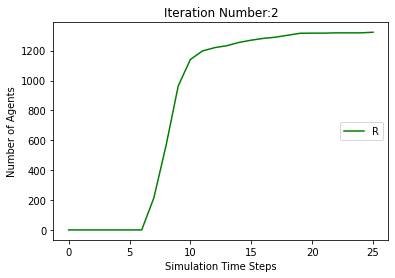

[9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677]
[215, 561, 959, 1146, 1222, 1250, 1269, 1062, 723, 334, 156, 90, 68, 51, 44, 38, 29, 20, 10, 5, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 561, 959, 1146, 1222, 1250, 1269, 1277, 1284, 1293, 1302, 1312, 1318, 1320, 1321, 1322, 1322, 1322, 1322, 1323]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677]]
[[], [215, 563, 930, 1138, 1200, 1211, 1218, 102

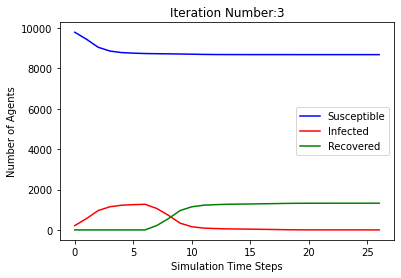

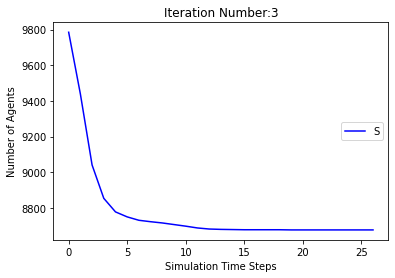

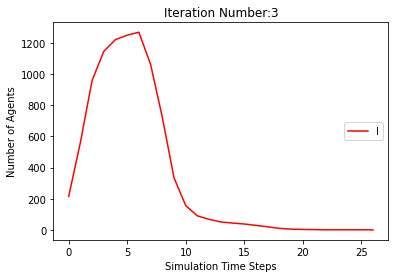

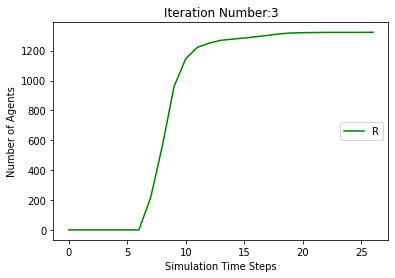

[9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 8640, 8640, 8640, 8640]
[215, 582, 979, 1176, 1227, 1246, 1257, 1064, 714, 337, 154, 113, 103, 97, 79, 63, 44, 30, 20, 11, 6, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 582, 979, 1176, 1227, 1246, 1257, 1279, 1296, 1316, 1330, 1340, 1349, 1354, 1358, 1359, 1360]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642,

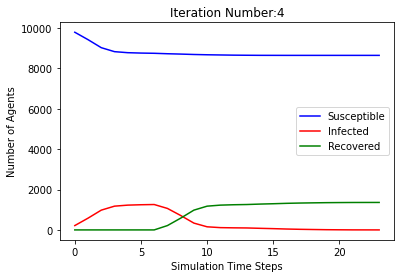

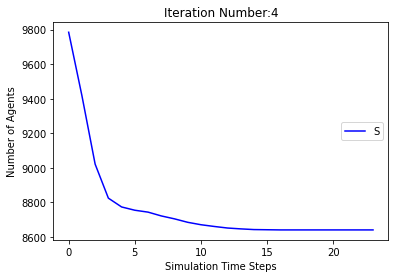

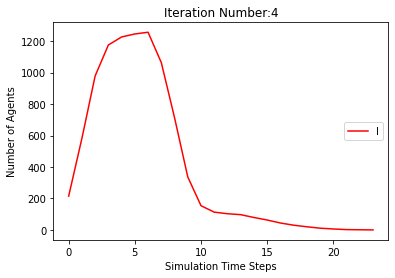

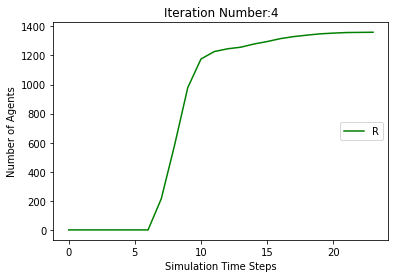

[9785, 9447, 9050, 8858, 8799, 8778, 8757, 8726, 8699, 8681, 8668, 8656, 8651, 8649, 8648, 8648, 8647, 8647, 8646, 8646, 8646, 8645, 8645, 8644, 8644, 8644, 8644, 8644, 8644, 8644, 8644]
[215, 553, 950, 1142, 1201, 1222, 1243, 1059, 748, 369, 190, 143, 127, 108, 78, 51, 34, 21, 10, 5, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 553, 950, 1142, 1201, 1222, 1243, 1274, 1301, 1319, 1332, 1344, 1349, 1351, 1352, 1352, 1353, 1353, 1354, 1354, 1354, 1355, 1355, 1356]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677

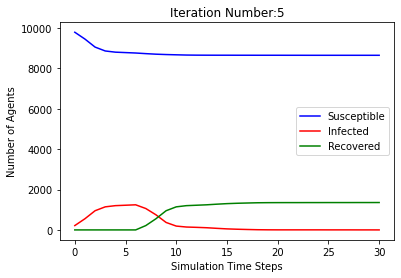

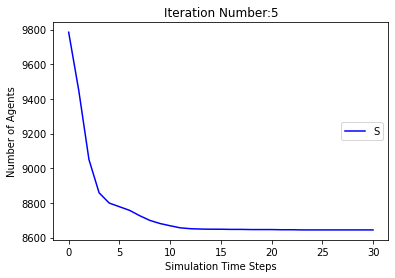

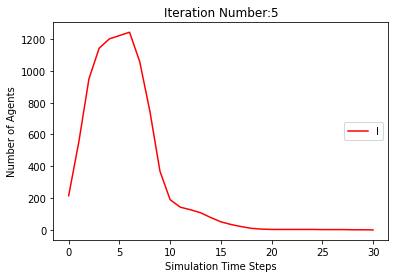

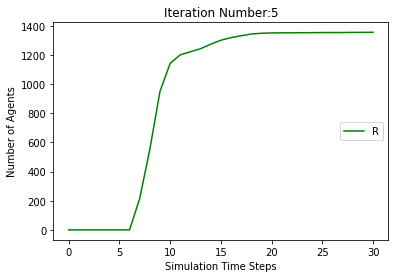

[9785, 9456, 9050, 8872, 8801, 8775, 8759, 8743, 8733, 8716, 8701, 8689, 8686, 8684, 8683, 8678, 8677, 8676, 8676, 8676, 8676, 8675, 8675, 8675, 8675, 8675, 8675, 8675, 8675]
[215, 544, 950, 1128, 1199, 1225, 1241, 1042, 723, 334, 171, 112, 89, 75, 60, 55, 39, 25, 13, 10, 8, 8, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 544, 950, 1128, 1199, 1225, 1241, 1257, 1267, 1284, 1299, 1311, 1314, 1316, 1317, 1322, 1323, 1324, 1324, 1324, 1324, 1325]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 902

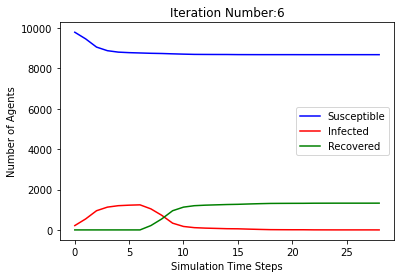

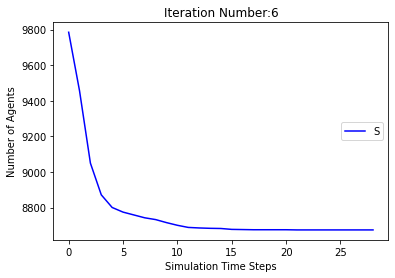

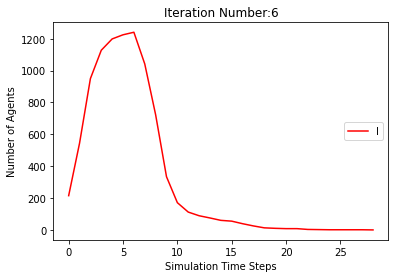

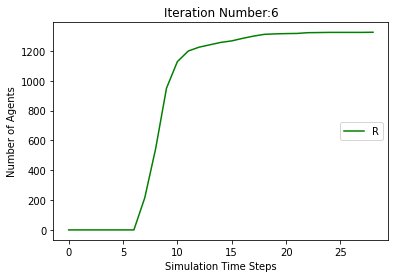

[9785, 9436, 9045, 8853, 8801, 8780, 8767, 8752, 8745, 8737, 8725, 8713, 8699, 8689, 8683, 8678, 8675, 8669, 8664, 8659, 8653, 8649, 8649, 8649, 8649, 8648, 8648, 8648, 8648, 8648, 8648, 8648, 8648]
[215, 564, 955, 1147, 1199, 1220, 1233, 1033, 691, 308, 128, 88, 81, 78, 69, 67, 62, 56, 49, 40, 36, 34, 29, 26, 20, 16, 11, 5, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 564, 955, 1147, 1199, 1220, 1233, 1248, 1255, 1263, 1275, 1287, 1301, 1311, 1317, 1322, 1325, 1331, 1336, 1341, 1347, 1351, 1351, 1351, 1351, 1352]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678,

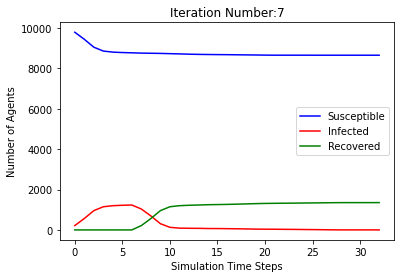

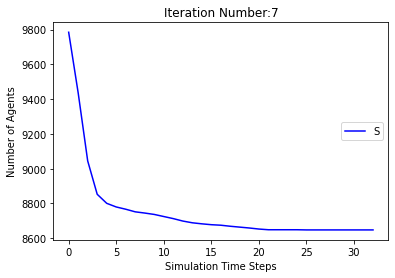

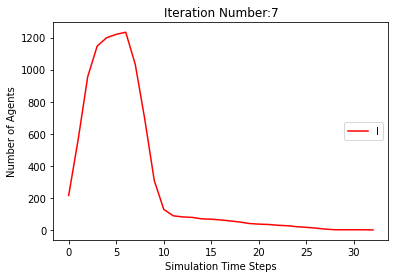

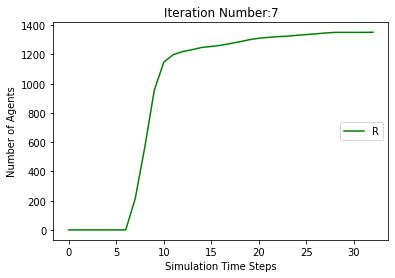

[9785, 9464, 9078, 8858, 8792, 8767, 8741, 8723, 8708, 8694, 8680, 8678, 8670, 8660, 8654, 8649, 8646, 8639, 8633, 8627, 8624, 8624, 8624, 8623, 8623, 8623, 8623, 8623, 8623, 8623, 8623]
[215, 536, 922, 1142, 1208, 1233, 1259, 1062, 756, 384, 178, 114, 97, 81, 69, 59, 48, 41, 45, 43, 36, 30, 25, 23, 16, 10, 4, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 536, 922, 1142, 1208, 1233, 1259, 1277, 1292, 1306, 1320, 1322, 1330, 1340, 1346, 1351, 1354, 1361, 1367, 1373, 1376, 1376, 1376, 1377]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677,

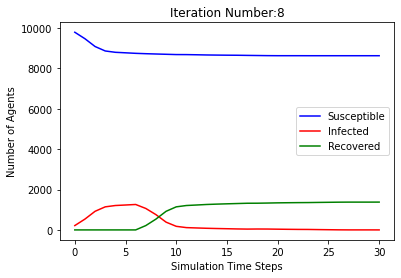

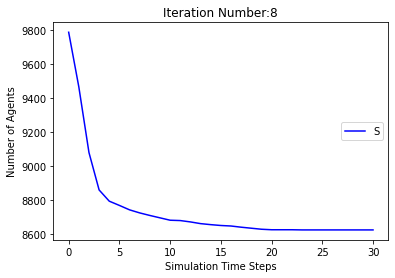

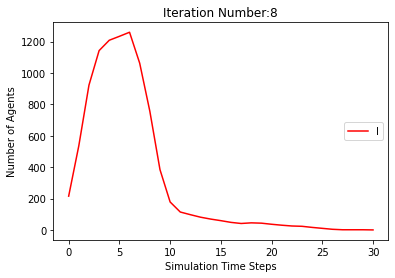

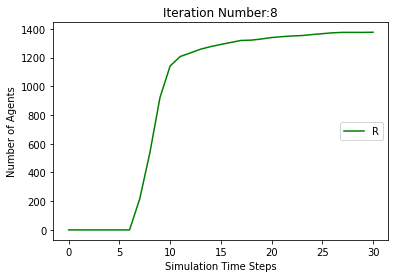

[9785, 9455, 9072, 8859, 8806, 8785, 8758, 8729, 8718, 8704, 8700, 8691, 8683, 8677, 8668, 8664, 8659, 8658, 8658, 8658, 8658, 8658, 8658, 8658, 8658]
[215, 545, 928, 1141, 1194, 1215, 1242, 1056, 737, 368, 159, 115, 102, 81, 61, 54, 45, 42, 33, 25, 19, 10, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 545, 928, 1141, 1194, 1215, 1242, 1271, 1282, 1296, 1300, 1309, 1317, 1323, 1332, 1336, 1341, 1342]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 

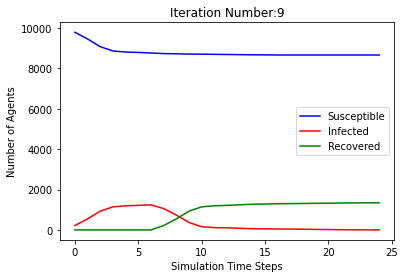

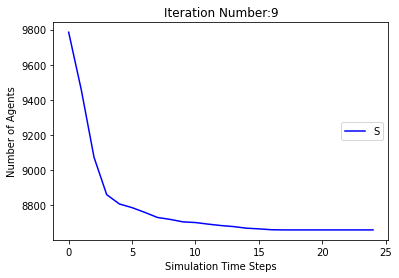

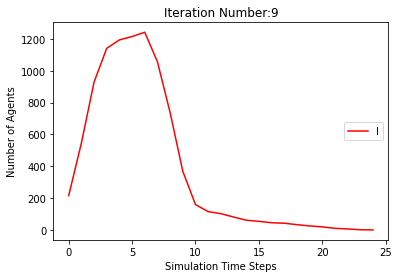

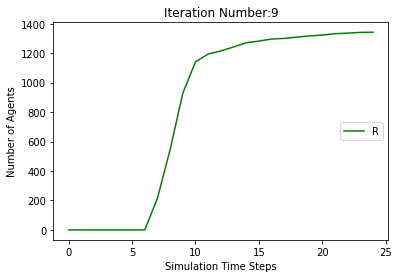

[9785, 9451, 9065, 8866, 8803, 8772, 8759, 8736, 8723, 8706, 8688, 8680, 8672, 8667, 8665, 8665, 8664, 8662, 8661, 8659, 8659, 8659, 8658, 8658, 8658, 8658, 8658, 8658, 8658, 8658]
[215, 549, 935, 1134, 1197, 1228, 1241, 1049, 728, 359, 178, 123, 100, 92, 71, 58, 42, 26, 19, 13, 8, 6, 7, 6, 4, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 549, 935, 1134, 1197, 1228, 1241, 1264, 1277, 1294, 1312, 1320, 1328, 1333, 1335, 1335, 1336, 1338, 1339, 1341, 1341, 1341, 1342]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], 

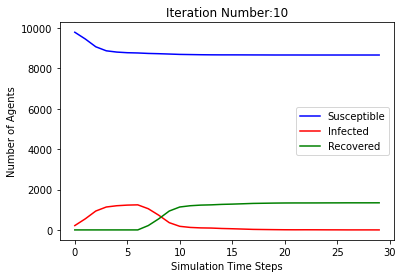

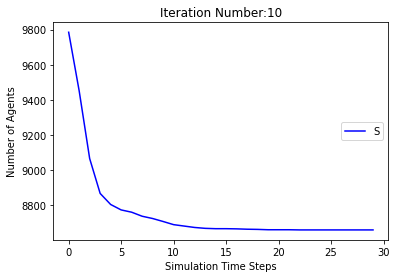

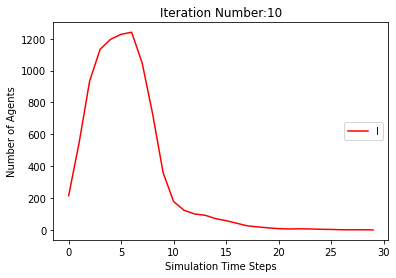

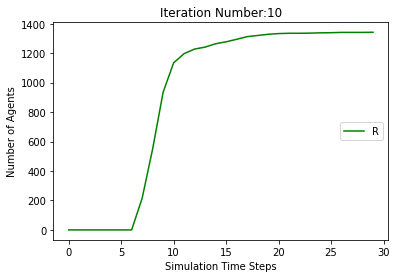

[9785, 9435, 9064, 8870, 8810, 8792, 8779, 8768, 8755, 8740, 8726, 8717, 8713, 8708, 8705, 8704, 8702, 8699, 8693, 8690, 8690, 8690, 8690, 8690, 8690, 8690, 8690]
[215, 565, 936, 1130, 1190, 1208, 1221, 1017, 680, 324, 144, 93, 79, 71, 63, 51, 38, 27, 24, 23, 18, 15, 14, 12, 9, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 565, 936, 1130, 1190, 1208, 1221, 1232, 1245, 1260, 1274, 1283, 1287, 1292, 1295, 1296, 1298, 1301, 1307, 1310]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 

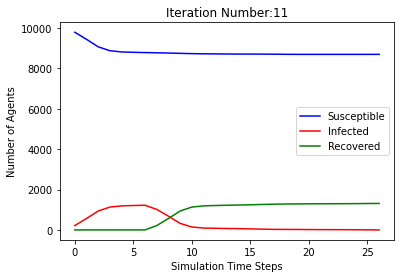

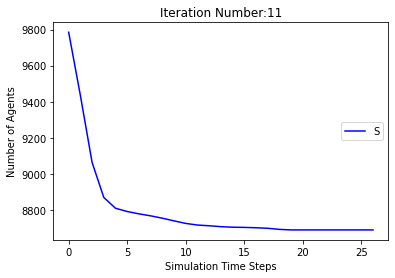

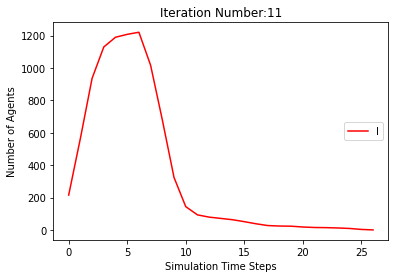

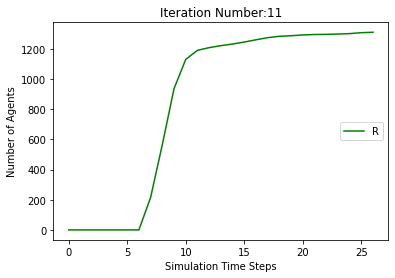

[9785, 9461, 9063, 8858, 8797, 8771, 8753, 8735, 8715, 8694, 8677, 8667, 8653, 8647, 8645, 8645, 8644, 8644, 8644, 8644, 8644, 8644, 8643, 8643, 8643, 8643, 8643, 8643, 8643, 8643]
[215, 539, 937, 1142, 1203, 1229, 1247, 1050, 746, 369, 181, 130, 118, 106, 90, 70, 50, 33, 23, 9, 3, 1, 2, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 539, 937, 1142, 1203, 1229, 1247, 1265, 1285, 1306, 1323, 1333, 1347, 1353, 1355, 1355, 1356, 1356, 1356, 1356, 1356, 1356, 1357]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], 

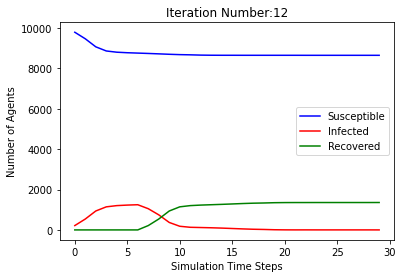

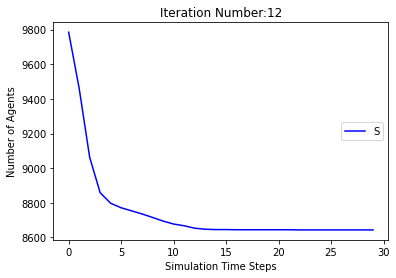

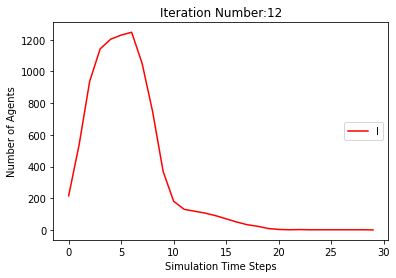

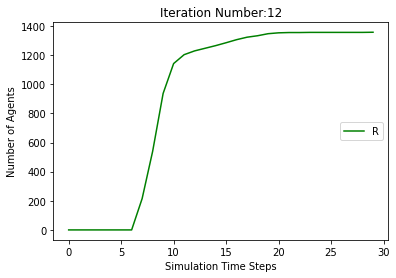

[9785, 9453, 9035, 8856, 8810, 8803, 8792, 8782, 8776, 8770, 8757, 8749, 8741, 8738, 8733, 8729, 8727, 8726, 8726, 8726, 8726, 8726, 8726, 8726, 8726]
[215, 547, 965, 1144, 1190, 1197, 1208, 1003, 677, 265, 99, 61, 62, 54, 49, 47, 43, 31, 23, 15, 12, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 547, 965, 1144, 1190, 1197, 1208, 1218, 1224, 1230, 1243, 1251, 1259, 1262, 1267, 1271, 1273, 1274]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651

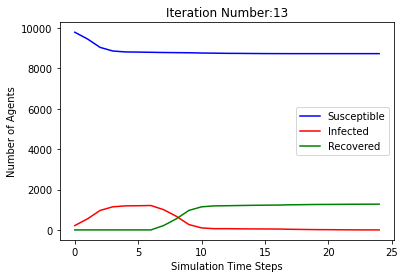

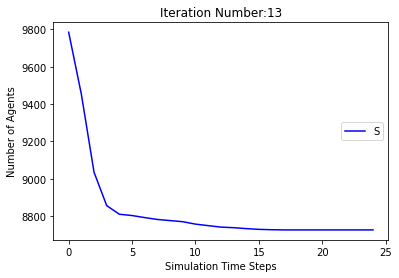

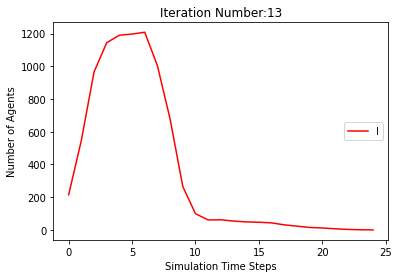

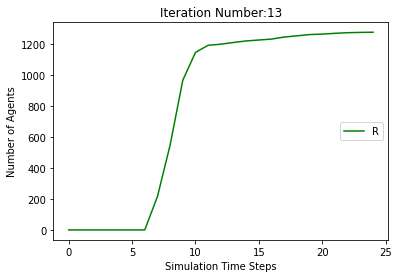

[9785, 9456, 9073, 8881, 8810, 8791, 8771, 8753, 8739, 8724, 8710, 8696, 8683, 8671, 8666, 8665, 8664, 8663, 8663, 8663, 8663, 8662, 8662, 8662, 8662, 8662, 8662, 8662, 8662]
[215, 544, 927, 1119, 1190, 1209, 1229, 1032, 717, 349, 171, 114, 108, 100, 87, 74, 60, 47, 33, 20, 8, 4, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 544, 927, 1119, 1190, 1209, 1229, 1247, 1261, 1276, 1290, 1304, 1317, 1329, 1334, 1335, 1336, 1337, 1337, 1337, 1337, 1338]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9

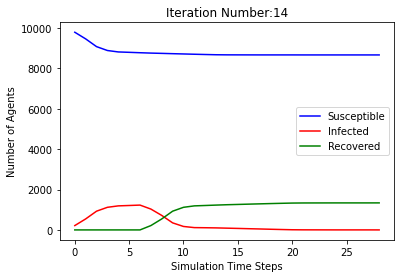

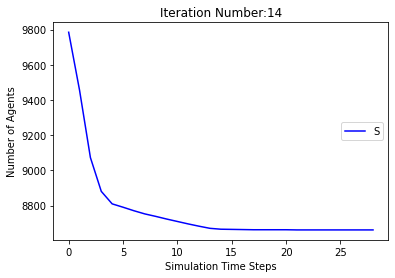

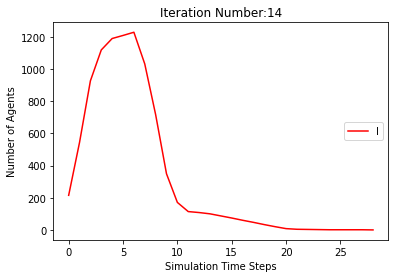

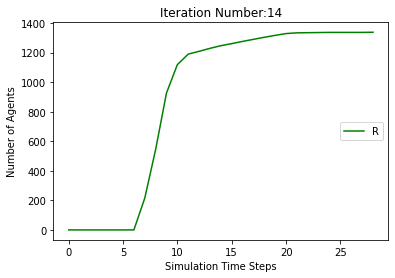

[9785, 9456, 9046, 8848, 8797, 8784, 8771, 8759, 8745, 8731, 8713, 8700, 8692, 8685, 8677, 8671, 8670, 8669, 8668, 8668, 8668, 8668, 8667, 8666, 8665, 8663, 8662, 8662, 8662, 8662, 8662, 8662, 8662, 8662]
[215, 544, 954, 1152, 1203, 1216, 1229, 1026, 711, 315, 135, 97, 92, 86, 82, 74, 61, 44, 32, 24, 17, 9, 4, 4, 4, 5, 6, 6, 6, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 544, 954, 1152, 1203, 1216, 1229, 1241, 1255, 1269, 1287, 1300, 1308, 1315, 1323, 1329, 1330, 1331, 1332, 1332, 1332, 1332, 1333, 1334, 1335, 1337, 1338]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 86

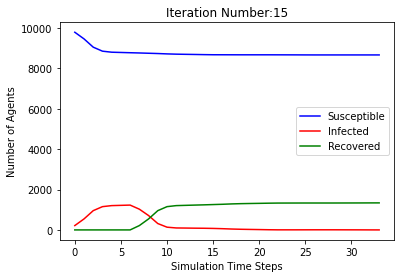

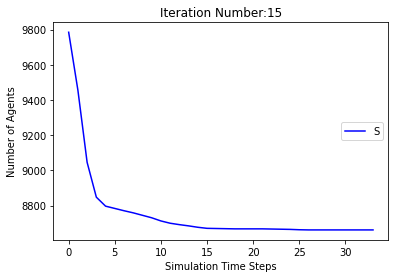

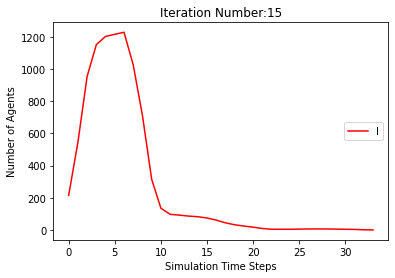

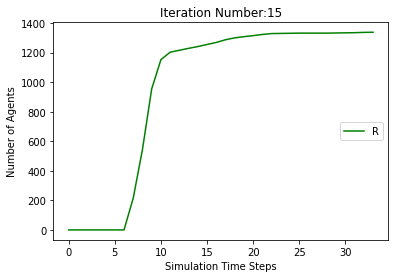

[9785, 9449, 9058, 8865, 8802, 8778, 8766, 8745, 8724, 8707, 8691, 8682, 8675, 8666, 8661, 8655, 8652, 8652, 8652, 8652, 8651, 8651, 8651, 8651, 8651, 8651, 8651, 8651]
[215, 551, 942, 1135, 1198, 1222, 1234, 1040, 725, 351, 174, 120, 103, 100, 84, 69, 55, 39, 30, 23, 15, 10, 4, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 551, 942, 1135, 1198, 1222, 1234, 1255, 1276, 1293, 1309, 1318, 1325, 1334, 1339, 1345, 1348, 1348, 1348, 1348, 1349]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 87

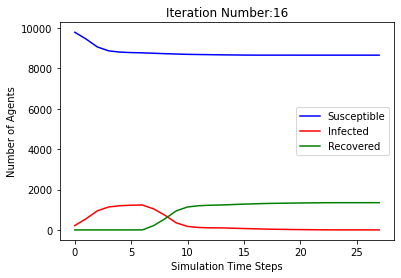

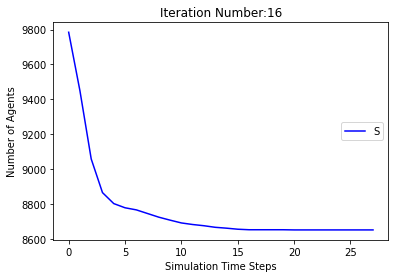

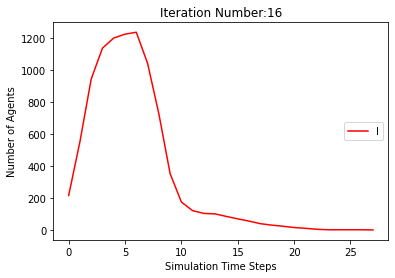

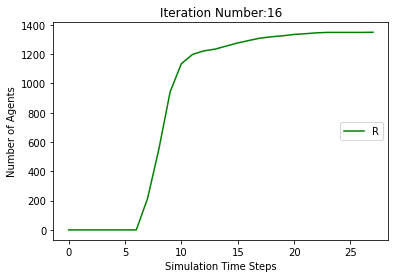

[9785, 9453, 9042, 8852, 8798, 8780, 8773, 8757, 8743, 8729, 8721, 8717, 8715, 8714, 8714, 8714, 8714, 8713, 8710, 8709, 8707, 8707, 8707, 8707, 8707, 8707, 8707, 8707]
[215, 547, 958, 1148, 1202, 1220, 1227, 1028, 710, 313, 131, 81, 65, 59, 43, 29, 15, 8, 7, 6, 7, 7, 7, 7, 6, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 547, 958, 1148, 1202, 1220, 1227, 1243, 1257, 1271, 1279, 1283, 1285, 1286, 1286, 1286, 1286, 1287, 1290, 1291, 1293]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754

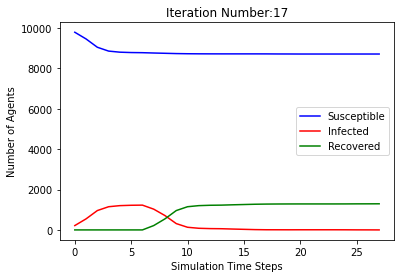

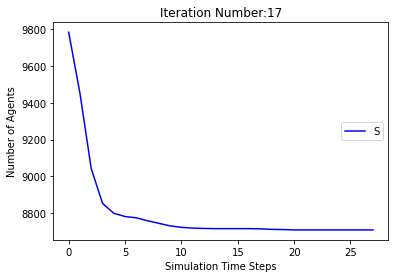

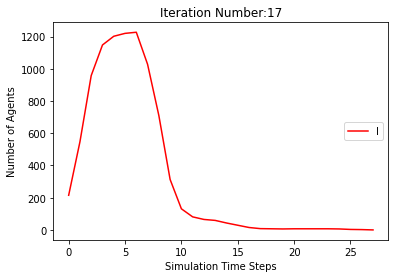

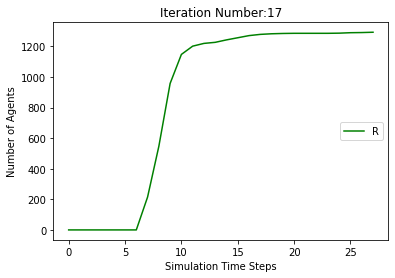

[9785, 9452, 9064, 8858, 8804, 8779, 8758, 8743, 8728, 8714, 8701, 8691, 8685, 8684, 8681, 8681, 8680, 8679, 8676, 8672, 8671, 8671, 8671, 8671, 8671, 8671, 8671, 8671]
[215, 548, 936, 1142, 1196, 1221, 1242, 1042, 724, 350, 157, 113, 94, 74, 62, 47, 34, 22, 15, 13, 13, 10, 10, 9, 8, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 548, 936, 1142, 1196, 1221, 1242, 1257, 1272, 1286, 1299, 1309, 1315, 1316, 1319, 1319, 1320, 1321, 1324, 1328, 1329]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 877

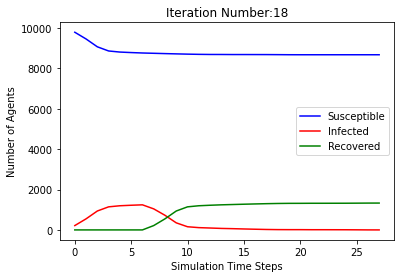

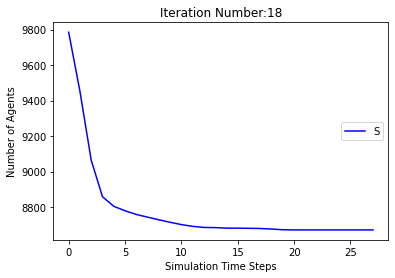

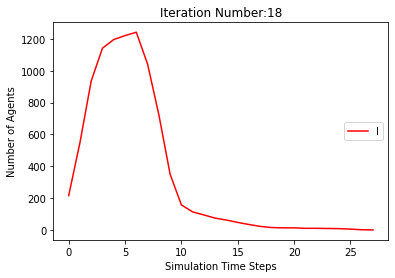

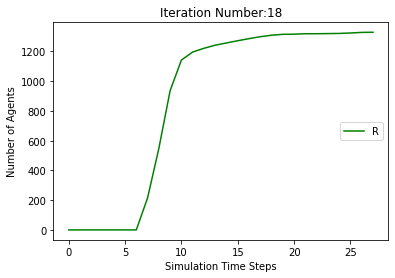

[9785, 9452, 9041, 8853, 8792, 8772, 8756, 8744, 8735, 8731, 8719, 8711, 8704, 8701, 8699, 8695, 8693, 8690, 8685, 8685, 8685, 8685, 8685, 8685, 8685, 8685]
[215, 548, 959, 1147, 1208, 1228, 1244, 1041, 717, 310, 134, 81, 68, 55, 45, 40, 38, 29, 26, 19, 16, 14, 10, 8, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 548, 959, 1147, 1208, 1228, 1244, 1256, 1265, 1269, 1281, 1289, 1296, 1299, 1301, 1305, 1307, 1310, 1315]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684

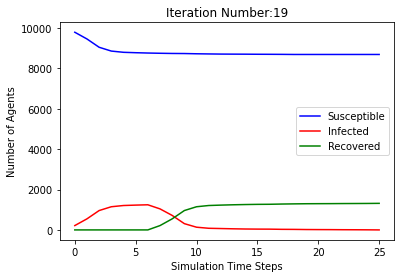

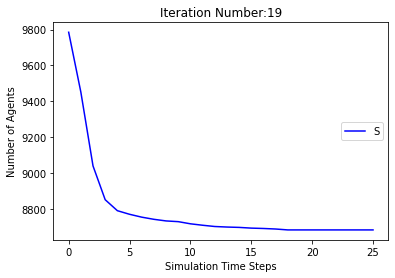

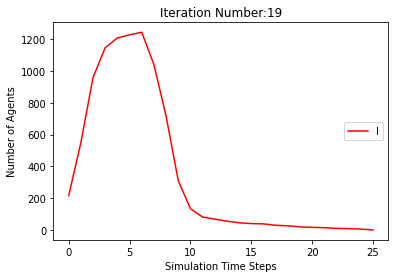

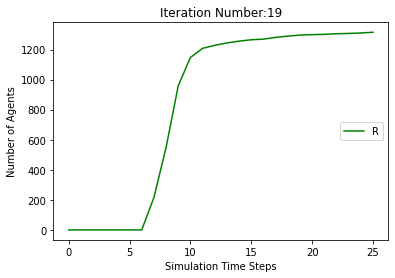

[9785, 9438, 9050, 8852, 8790, 8764, 8749, 8725, 8707, 8696, 8689, 8687, 8687, 8684, 8678, 8672, 8669, 8668, 8668, 8667, 8667, 8665, 8665, 8665, 8664, 8664, 8664, 8664, 8664, 8664, 8664, 8664]
[215, 562, 950, 1148, 1210, 1236, 1251, 1060, 731, 354, 163, 103, 77, 65, 47, 35, 27, 21, 19, 20, 17, 13, 7, 4, 4, 4, 3, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 562, 950, 1148, 1210, 1236, 1251, 1275, 1293, 1304, 1311, 1313, 1313, 1316, 1322, 1328, 1331, 1332, 1332, 1333, 1333, 1335, 1335, 1335, 1336]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 

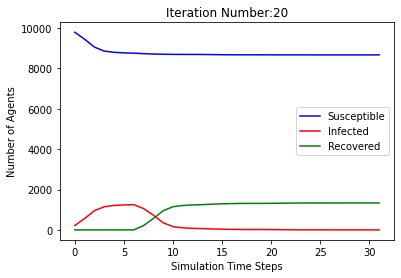

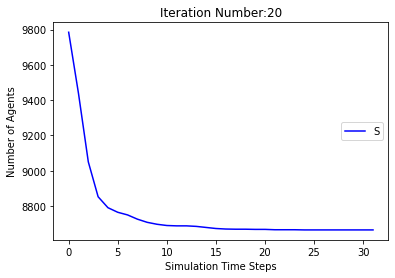

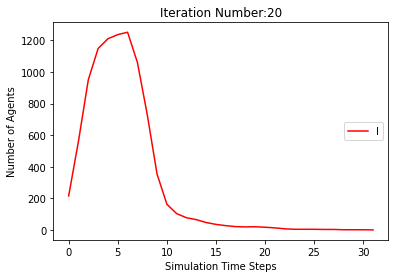

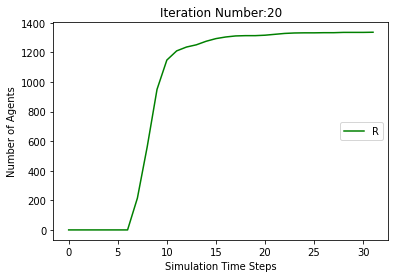

[9785, 9464, 9061, 8868, 8812, 8797, 8785, 8765, 8744, 8730, 8723, 8717, 8709, 8703, 8698, 8697, 8697, 8696, 8696, 8696, 8696, 8695, 8695, 8695, 8695, 8695, 8695, 8695, 8695]
[215, 536, 939, 1132, 1188, 1203, 1215, 1020, 720, 331, 145, 95, 88, 82, 67, 47, 33, 27, 21, 13, 7, 3, 2, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 536, 939, 1132, 1188, 1203, 1215, 1235, 1256, 1270, 1277, 1283, 1291, 1297, 1302, 1303, 1303, 1304, 1304, 1304, 1304, 1305]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021

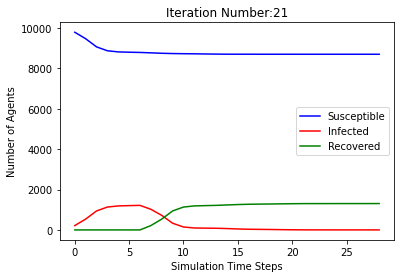

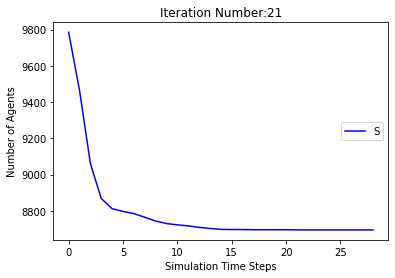

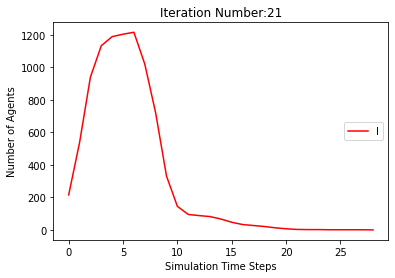

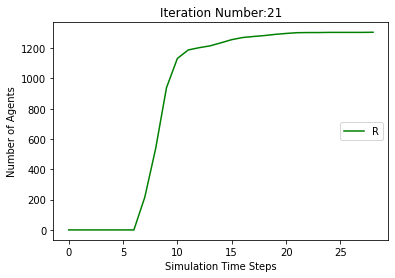

[9785, 9462, 9080, 8860, 8783, 8760, 8754, 8749, 8744, 8736, 8727, 8719, 8713, 8706, 8702, 8701, 8701, 8701, 8701, 8701, 8701, 8701, 8701]
[215, 538, 920, 1140, 1217, 1240, 1246, 1036, 718, 344, 133, 64, 47, 48, 47, 43, 35, 26, 18, 12, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 538, 920, 1140, 1217, 1240, 1246, 1251, 1256, 1264, 1273, 1281, 1287, 1294, 1298, 1299]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640

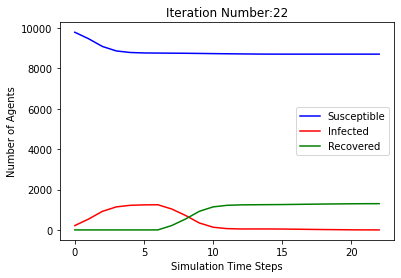

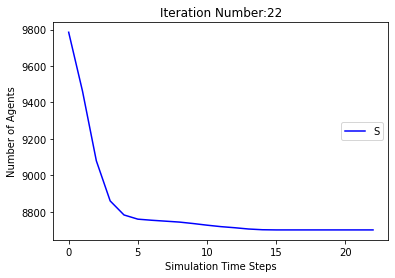

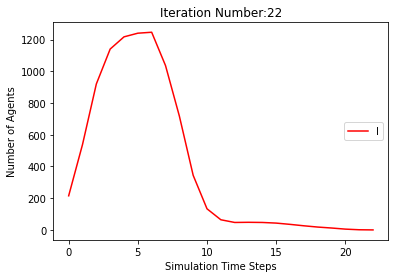

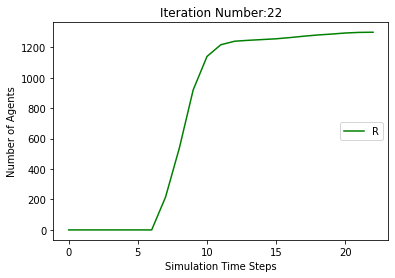

[9785, 9452, 9062, 8854, 8811, 8792, 8786, 8775, 8764, 8741, 8731, 8717, 8703, 8700, 8698, 8696, 8696, 8696, 8696, 8696, 8696, 8696, 8696]
[215, 548, 938, 1146, 1189, 1208, 1214, 1010, 688, 321, 123, 94, 89, 86, 77, 68, 45, 35, 21, 7, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 548, 938, 1146, 1189, 1208, 1214, 1225, 1236, 1259, 1269, 1283, 1297, 1300, 1302, 1304]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640,

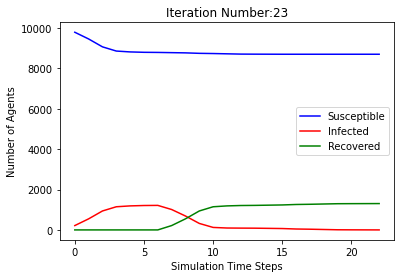

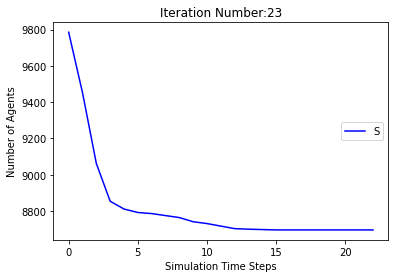

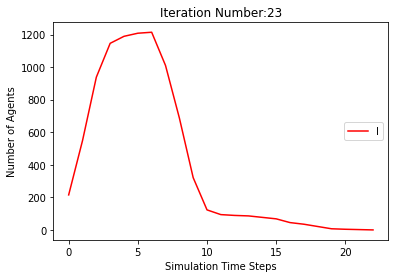

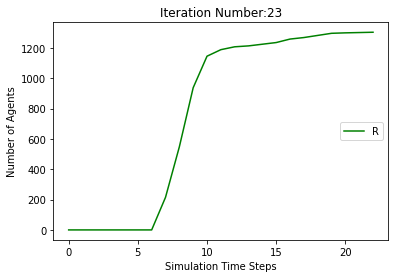

[9785, 9484, 9049, 8847, 8809, 8793, 8787, 8779, 8760, 8729, 8698, 8678, 8675, 8672, 8666, 8664, 8659, 8655, 8654, 8654, 8654, 8654, 8654, 8654, 8654, 8654]
[215, 516, 951, 1153, 1191, 1207, 1213, 1006, 724, 320, 149, 131, 118, 115, 113, 96, 70, 43, 24, 21, 18, 12, 10, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 516, 951, 1153, 1191, 1207, 1213, 1221, 1240, 1271, 1302, 1322, 1325, 1328, 1334, 1336, 1341, 1345, 1346]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 

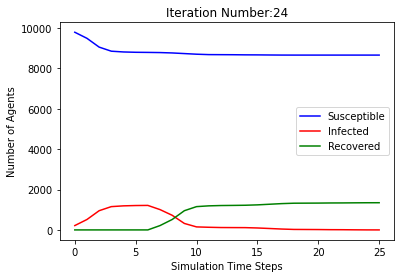

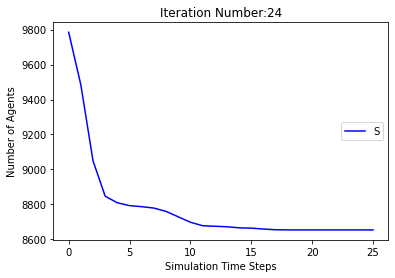

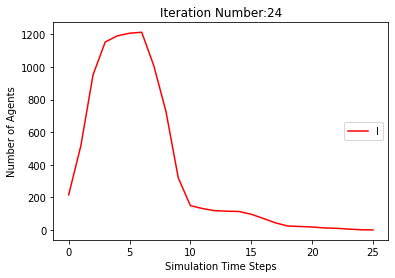

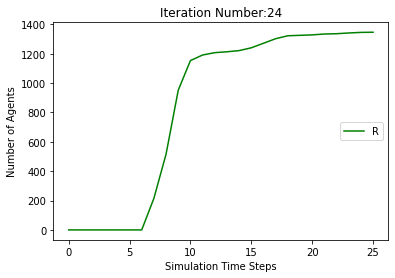

[9785, 9432, 9047, 8834, 8792, 8776, 8758, 8734, 8715, 8703, 8686, 8674, 8671, 8665, 8657, 8652, 8649, 8648, 8647, 8647, 8647, 8647, 8647, 8647, 8647, 8647]
[215, 568, 953, 1166, 1208, 1224, 1242, 1051, 717, 344, 148, 118, 105, 93, 77, 63, 54, 38, 27, 24, 18, 10, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 568, 953, 1166, 1208, 1224, 1242, 1266, 1285, 1297, 1314, 1326, 1329, 1335, 1343, 1348, 1351, 1352, 1353]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 868

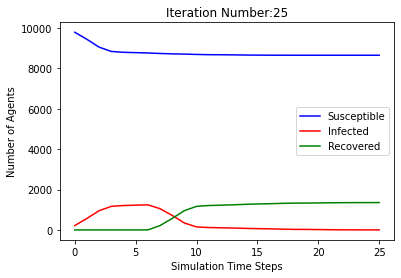

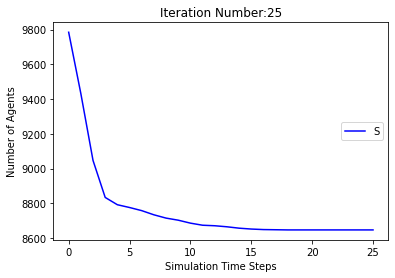

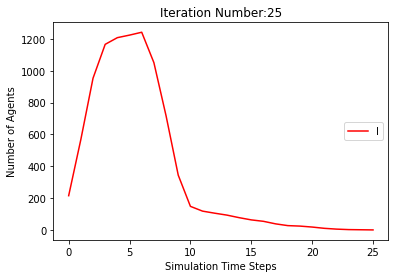

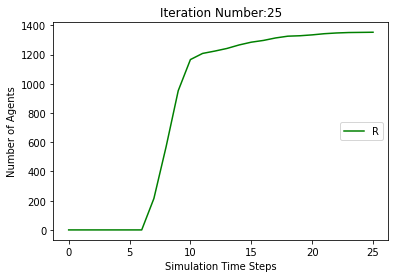

[9785, 9449, 9069, 8864, 8808, 8796, 8784, 8770, 8744, 8720, 8706, 8694, 8690, 8687, 8681, 8676, 8675, 8673, 8672, 8672, 8672, 8672, 8672, 8672, 8670, 8670, 8669, 8669, 8669, 8669, 8669, 8669, 8669, 8669]
[215, 551, 931, 1136, 1192, 1204, 1216, 1015, 705, 349, 158, 114, 106, 97, 89, 68, 45, 33, 22, 18, 15, 9, 4, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 551, 931, 1136, 1192, 1204, 1216, 1230, 1256, 1280, 1294, 1306, 1310, 1313, 1319, 1324, 1325, 1327, 1328, 1328, 1328, 1328, 1328, 1328, 1330, 1330, 1331]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 

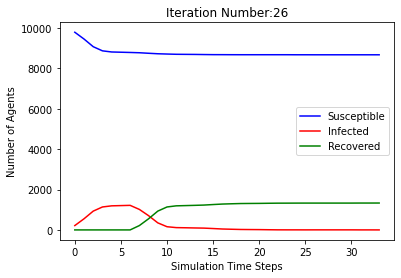

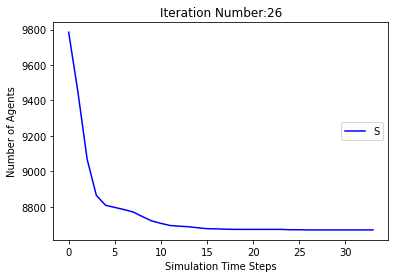

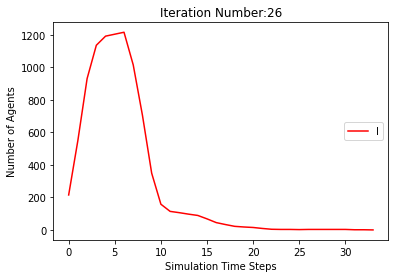

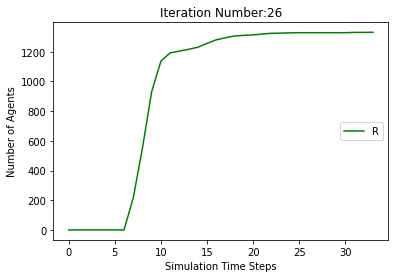

[9785, 9474, 9087, 8863, 8805, 8784, 8773, 8761, 8742, 8726, 8715, 8708, 8705, 8699, 8698, 8696, 8696, 8696, 8696, 8696, 8696, 8695, 8695, 8695, 8695, 8695, 8695, 8695, 8695]
[215, 526, 913, 1137, 1195, 1216, 1227, 1024, 732, 361, 148, 97, 79, 74, 63, 46, 30, 19, 12, 9, 3, 3, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 526, 913, 1137, 1195, 1216, 1227, 1239, 1258, 1274, 1285, 1292, 1295, 1301, 1302, 1304, 1304, 1304, 1304, 1304, 1304, 1305]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021,

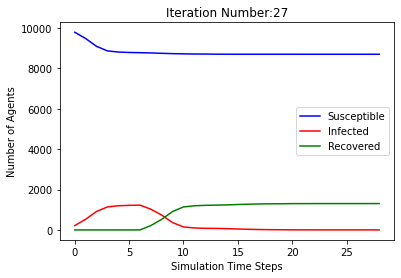

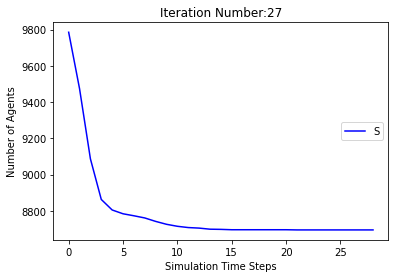

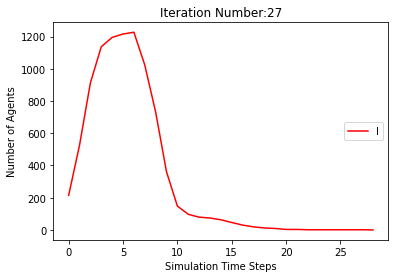

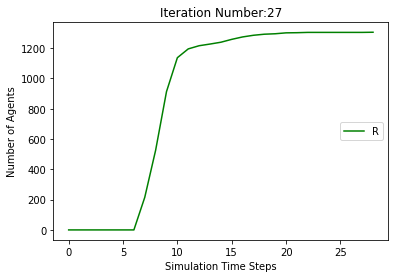

[9785, 9433, 9057, 8866, 8802, 8768, 8746, 8731, 8713, 8697, 8690, 8686, 8682, 8679, 8677, 8677, 8676, 8676, 8676, 8676, 8676, 8676, 8676, 8676]
[215, 567, 943, 1134, 1198, 1232, 1254, 1054, 720, 360, 176, 116, 86, 67, 54, 36, 21, 14, 10, 6, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 567, 943, 1134, 1198, 1232, 1254, 1269, 1287, 1303, 1310, 1314, 1318, 1321, 1323, 1323, 1324]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8

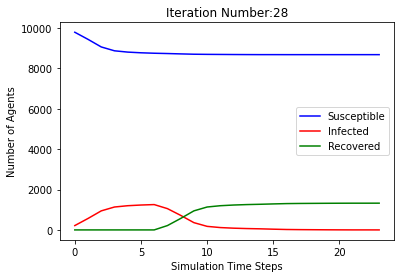

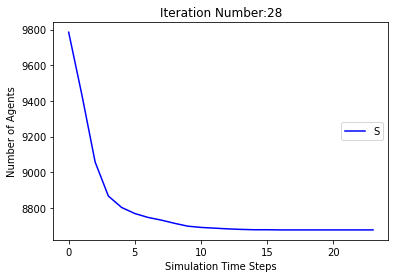

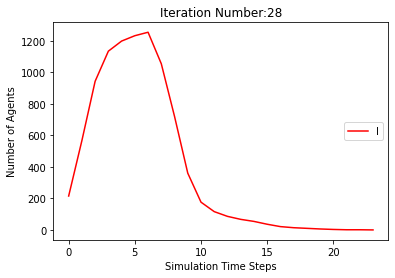

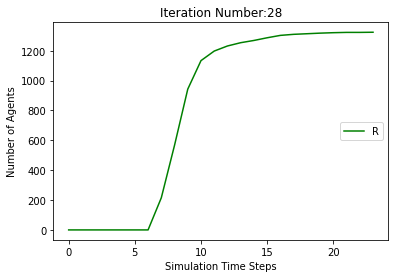

[9785, 9463, 9060, 8855, 8780, 8759, 8740, 8723, 8709, 8703, 8694, 8683, 8675, 8671, 8667, 8665, 8660, 8658, 8657, 8657, 8657, 8657, 8657, 8657, 8657, 8657]
[215, 537, 940, 1145, 1220, 1241, 1260, 1062, 754, 357, 161, 97, 84, 69, 56, 44, 43, 36, 26, 18, 14, 10, 8, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 537, 940, 1145, 1220, 1241, 1260, 1277, 1291, 1297, 1306, 1317, 1325, 1329, 1333, 1335, 1340, 1342, 1343]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684,

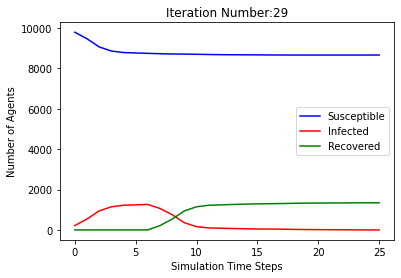

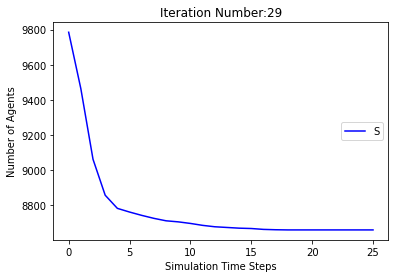

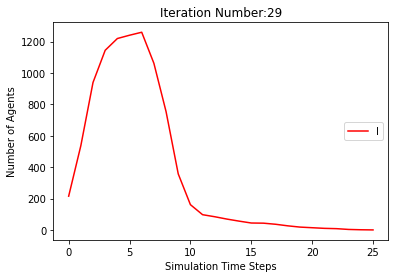

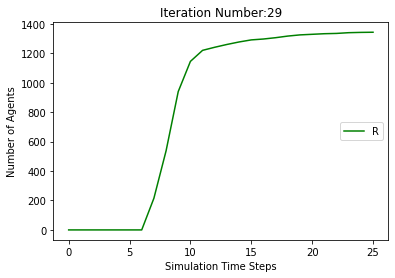

[9785, 9444, 9076, 8856, 8794, 8764, 8731, 8707, 8689, 8673, 8659, 8655, 8655, 8654, 8654, 8653, 8653, 8652, 8652, 8652, 8652, 8652, 8652, 8652, 8652]
[215, 556, 924, 1144, 1206, 1236, 1269, 1078, 755, 403, 197, 139, 109, 77, 53, 36, 20, 7, 3, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 556, 924, 1144, 1206, 1236, 1269, 1293, 1311, 1327, 1341, 1345, 1345, 1346, 1346, 1347, 1347, 1348]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651,

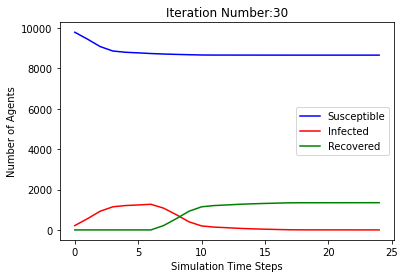

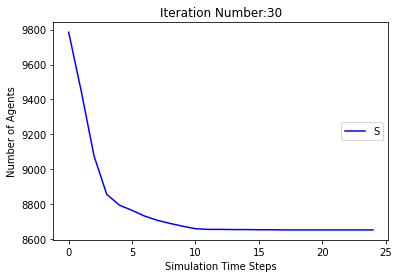

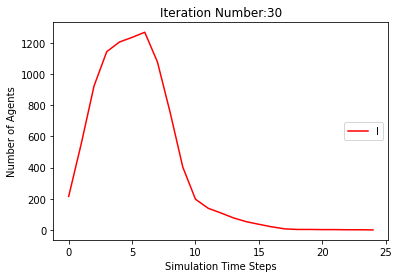

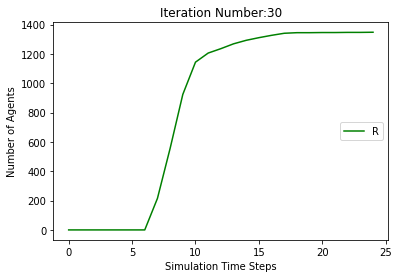

[9785, 9458, 9087, 8885, 8808, 8780, 8766, 8751, 8736, 8714, 8692, 8677, 8670, 8669, 8667, 8667, 8666, 8666, 8666, 8666, 8665, 8665, 8664, 8664, 8664, 8664, 8664, 8664, 8664, 8664]
[215, 542, 913, 1115, 1192, 1220, 1234, 1034, 722, 373, 193, 131, 110, 97, 84, 69, 48, 26, 11, 4, 4, 2, 3, 2, 2, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 542, 913, 1115, 1192, 1220, 1234, 1249, 1264, 1286, 1308, 1323, 1330, 1331, 1333, 1333, 1334, 1334, 1334, 1334, 1335, 1335, 1336]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [

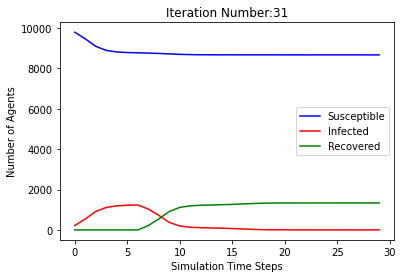

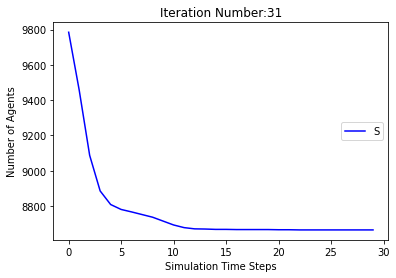

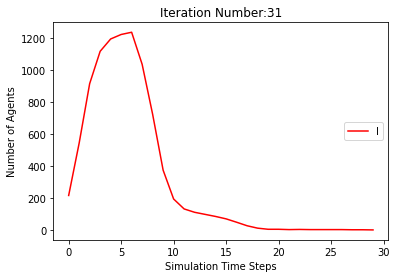

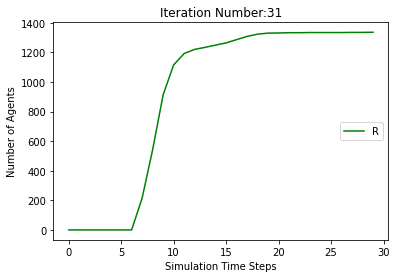

[9785, 9447, 9073, 8849, 8778, 8742, 8700, 8678, 8657, 8642, 8631, 8622, 8614, 8610, 8607, 8604, 8603, 8603, 8603, 8603, 8603, 8603, 8603, 8603]
[215, 553, 927, 1151, 1222, 1258, 1300, 1107, 790, 431, 218, 156, 128, 90, 71, 53, 39, 28, 19, 11, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 553, 927, 1151, 1222, 1258, 1300, 1322, 1343, 1358, 1369, 1378, 1386, 1390, 1393, 1396, 1397]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642,

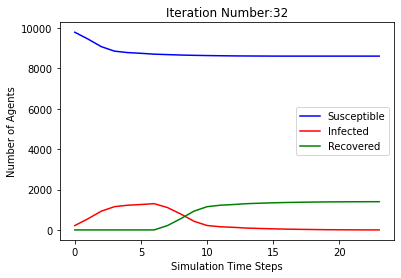

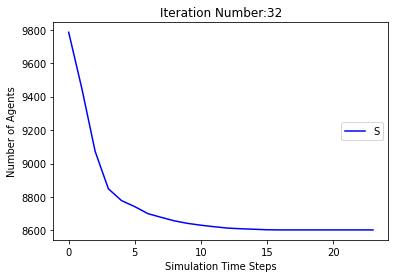

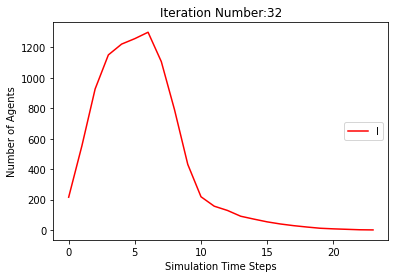

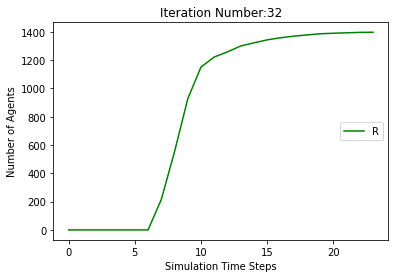

[9785, 9473, 9093, 8874, 8797, 8773, 8751, 8740, 8728, 8702, 8688, 8680, 8677, 8672, 8667, 8662, 8655, 8652, 8649, 8646, 8643, 8643, 8643, 8643, 8643, 8643, 8643, 8643]
[215, 527, 907, 1126, 1203, 1227, 1249, 1045, 745, 391, 186, 117, 96, 79, 73, 66, 47, 36, 31, 31, 29, 24, 19, 12, 9, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 527, 907, 1126, 1203, 1227, 1249, 1260, 1272, 1298, 1312, 1320, 1323, 1328, 1333, 1338, 1345, 1348, 1351, 1354, 1357]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 87

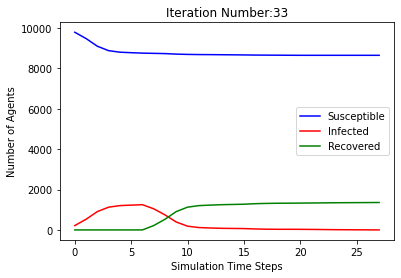

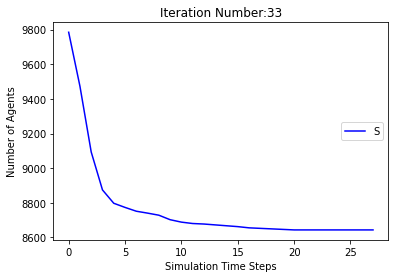

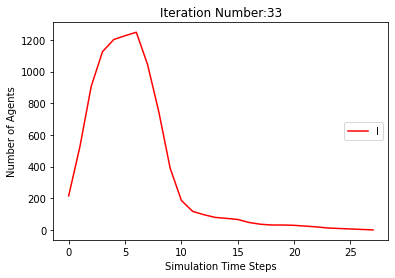

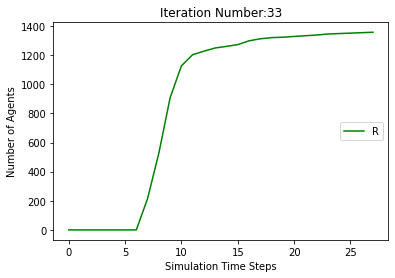

[9785, 9443, 9033, 8826, 8778, 8761, 8747, 8727, 8710, 8693, 8682, 8673, 8666, 8664, 8662, 8661, 8659, 8655, 8653, 8650, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645]
[215, 557, 967, 1174, 1222, 1239, 1253, 1058, 733, 340, 144, 105, 95, 83, 65, 49, 34, 27, 20, 16, 19, 17, 16, 14, 10, 8, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 557, 967, 1174, 1222, 1239, 1253, 1273, 1290, 1307, 1318, 1327, 1334, 1336, 1338, 1339, 1341, 1345, 1347, 1350, 1355]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8

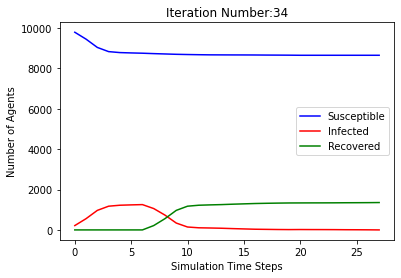

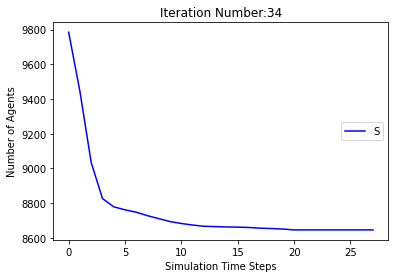

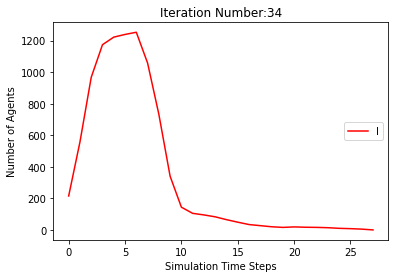

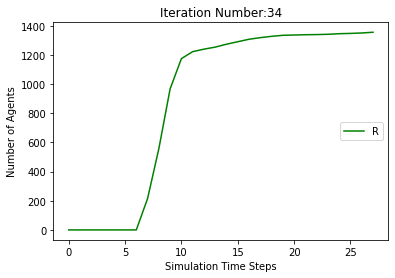

[9785, 9431, 9051, 8859, 8811, 8785, 8761, 8744, 8725, 8711, 8699, 8687, 8675, 8670, 8666, 8661, 8655, 8654, 8654, 8654, 8654, 8654, 8654, 8654, 8654]
[215, 569, 949, 1141, 1189, 1215, 1239, 1041, 706, 340, 160, 124, 110, 91, 78, 64, 56, 45, 33, 21, 16, 12, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 569, 949, 1141, 1189, 1215, 1239, 1256, 1275, 1289, 1301, 1313, 1325, 1330, 1334, 1339, 1345, 1346]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 

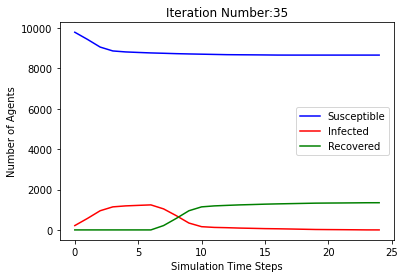

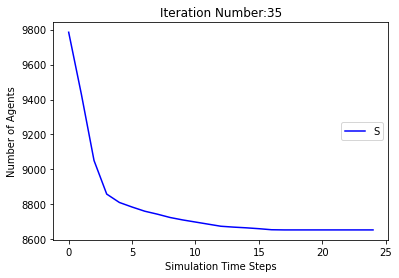

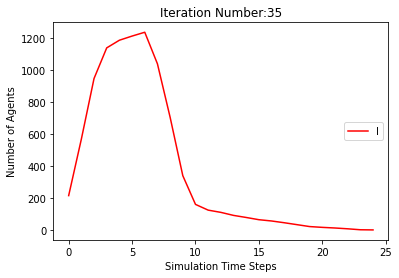

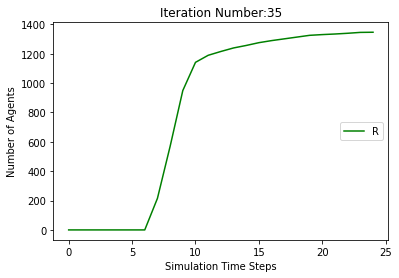

[9785, 9448, 9055, 8842, 8793, 8776, 8757, 8730, 8713, 8692, 8680, 8675, 8671, 8662, 8655, 8651, 8651, 8651, 8651, 8651, 8649, 8648, 8648, 8648, 8648, 8647, 8647, 8647, 8647, 8647, 8647, 8647, 8647]
[215, 552, 945, 1158, 1207, 1224, 1243, 1055, 735, 363, 162, 118, 105, 95, 75, 62, 41, 29, 24, 20, 13, 7, 3, 3, 3, 4, 4, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 552, 945, 1158, 1207, 1224, 1243, 1270, 1287, 1308, 1320, 1325, 1329, 1338, 1345, 1349, 1349, 1349, 1349, 1349, 1351, 1352, 1352, 1352, 1352, 1353]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 867

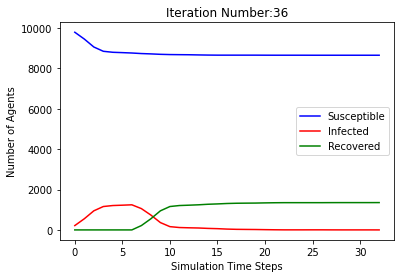

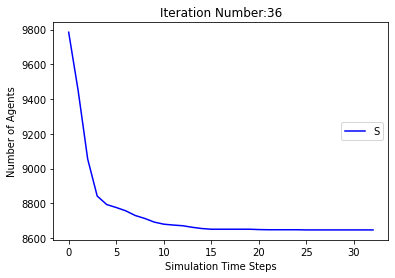

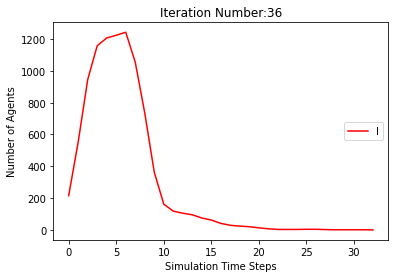

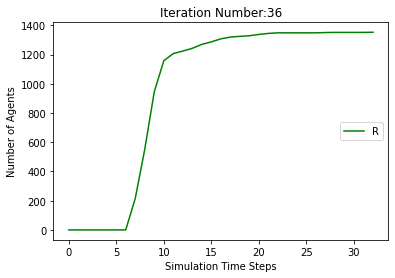

[9785, 9469, 9080, 8865, 8801, 8778, 8764, 8744, 8729, 8715, 8702, 8690, 8682, 8678, 8675, 8671, 8667, 8663, 8656, 8649, 8648, 8646, 8645, 8645, 8645, 8643, 8640, 8640, 8640, 8640, 8640, 8640, 8640, 8640]
[215, 531, 920, 1135, 1199, 1222, 1236, 1041, 740, 365, 163, 111, 96, 86, 69, 58, 48, 39, 34, 33, 30, 29, 26, 22, 18, 13, 9, 8, 6, 5, 5, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 531, 920, 1135, 1199, 1222, 1236, 1256, 1271, 1285, 1298, 1310, 1318, 1322, 1325, 1329, 1333, 1337, 1344, 1351, 1352, 1354, 1355, 1355, 1355, 1357, 1360]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 86

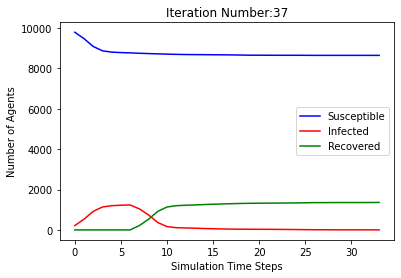

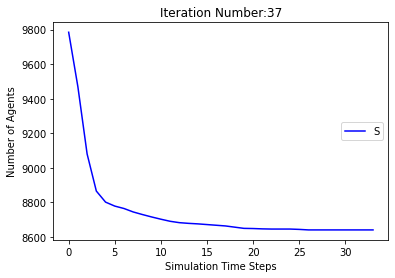

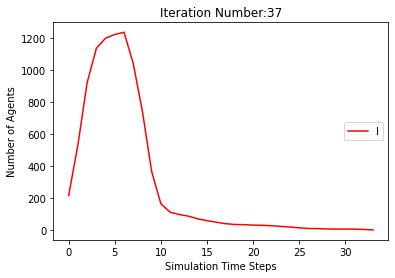

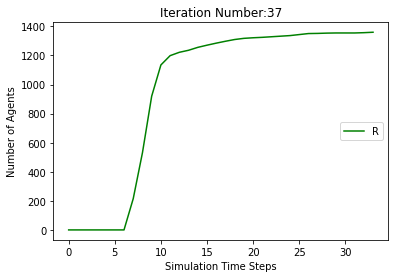

[9785, 9447, 9046, 8838, 8778, 8751, 8734, 8717, 8691, 8674, 8657, 8643, 8634, 8626, 8623, 8619, 8618, 8618, 8618, 8617, 8617, 8617, 8617, 8617, 8617, 8617, 8617]
[215, 553, 954, 1162, 1222, 1249, 1266, 1068, 756, 372, 181, 135, 117, 108, 94, 72, 56, 39, 25, 17, 9, 6, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 553, 954, 1162, 1222, 1249, 1266, 1283, 1309, 1326, 1343, 1357, 1366, 1374, 1377, 1381, 1382, 1382, 1382, 1383]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8

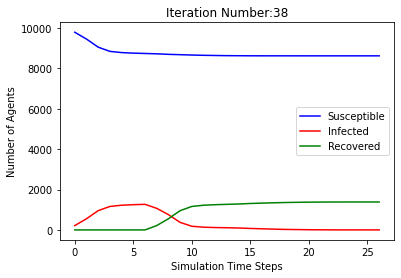

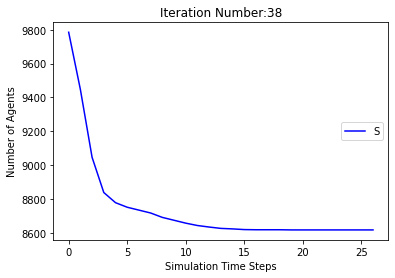

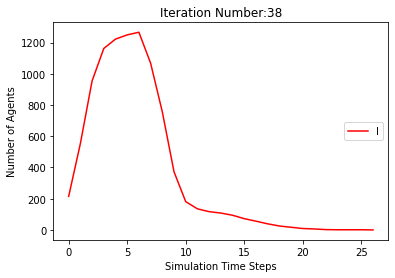

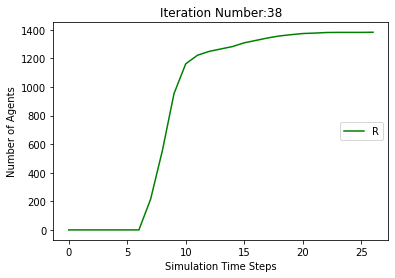

[9785, 9457, 9062, 8860, 8789, 8761, 8744, 8736, 8719, 8692, 8683, 8677, 8674, 8671, 8659, 8647, 8643, 8641, 8639, 8639, 8639, 8639, 8639, 8639, 8639, 8639]
[215, 543, 938, 1140, 1211, 1239, 1256, 1049, 738, 370, 177, 112, 87, 73, 77, 72, 49, 42, 38, 35, 32, 20, 8, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 543, 938, 1140, 1211, 1239, 1256, 1264, 1281, 1308, 1317, 1323, 1326, 1329, 1341, 1353, 1357, 1359, 1361]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684

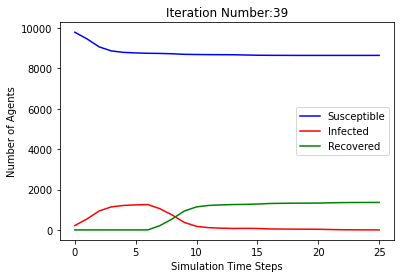

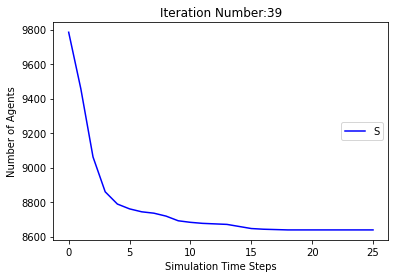

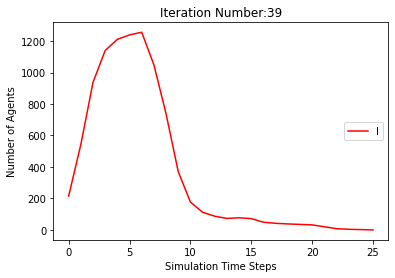

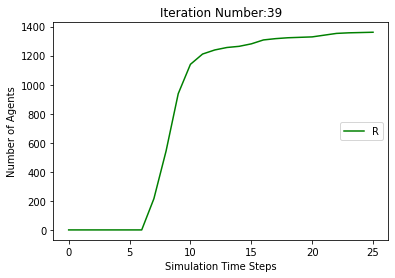

[9785, 9444, 9052, 8846, 8777, 8739, 8714, 8687, 8664, 8646, 8639, 8627, 8624, 8622, 8620, 8618, 8617, 8614, 8611, 8610, 8609, 8608, 8608, 8608, 8608, 8608, 8608, 8608, 8608]
[215, 556, 948, 1154, 1223, 1261, 1286, 1098, 780, 406, 207, 150, 115, 92, 67, 46, 29, 25, 16, 14, 13, 12, 10, 9, 6, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 556, 948, 1154, 1223, 1261, 1286, 1313, 1336, 1354, 1361, 1373, 1376, 1378, 1380, 1382, 1383, 1386, 1389, 1390, 1391, 1392]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418,

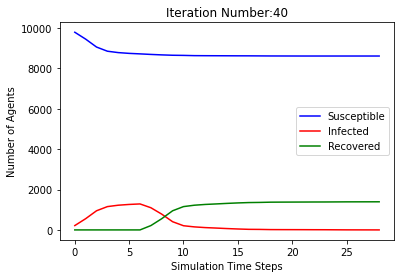

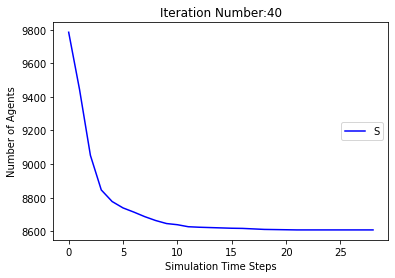

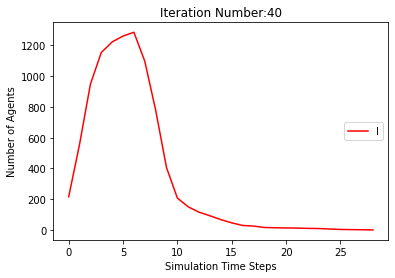

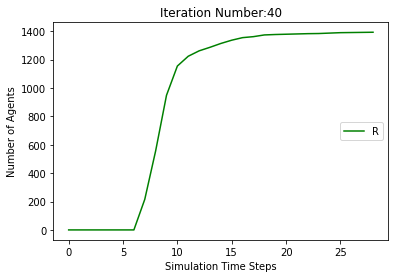

[9785, 9470, 9071, 8857, 8797, 8779, 8759, 8738, 8712, 8693, 8684, 8680, 8680, 8675, 8671, 8666, 8661, 8659, 8658, 8657, 8657, 8657, 8657, 8657, 8657, 8657, 8657]
[215, 530, 929, 1143, 1203, 1221, 1241, 1047, 758, 378, 173, 117, 99, 84, 67, 46, 32, 25, 22, 23, 18, 14, 9, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 530, 929, 1143, 1203, 1221, 1241, 1262, 1288, 1307, 1316, 1320, 1320, 1325, 1329, 1334, 1339, 1341, 1342, 1343]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8

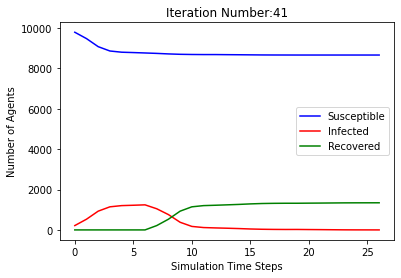

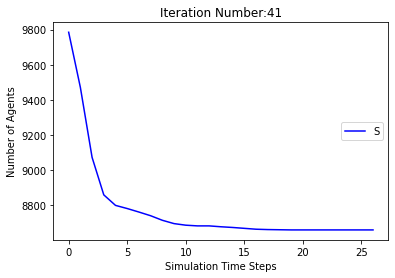

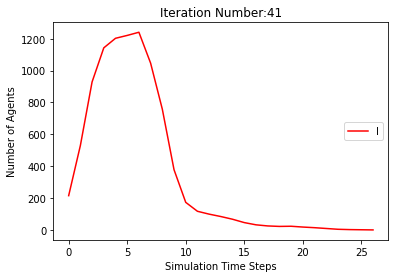

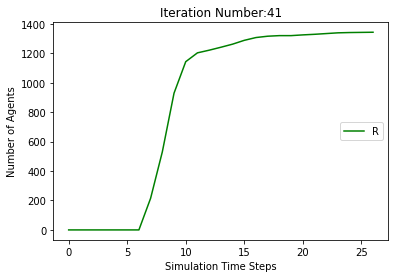

[9785, 9445, 9063, 8859, 8805, 8785, 8763, 8747, 8738, 8727, 8720, 8712, 8710, 8710, 8709, 8707, 8705, 8705, 8705, 8705, 8705, 8705, 8705, 8705]
[215, 555, 937, 1141, 1195, 1215, 1237, 1038, 707, 336, 139, 93, 75, 53, 38, 31, 22, 15, 7, 5, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 555, 937, 1141, 1195, 1215, 1237, 1253, 1262, 1273, 1280, 1288, 1290, 1290, 1291, 1293, 1295]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 864

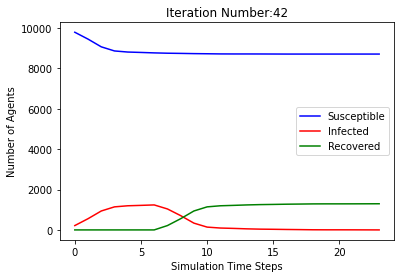

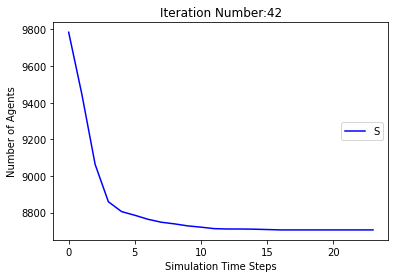

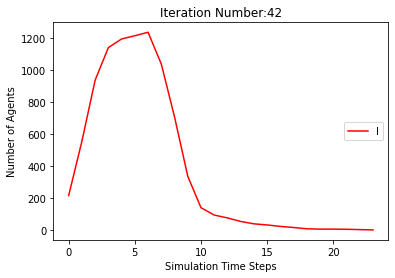

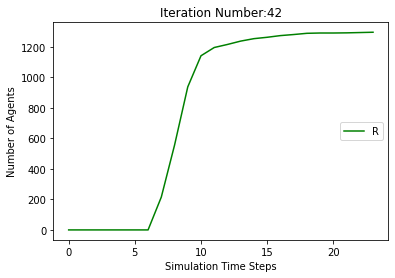

[9785, 9467, 9081, 8869, 8805, 8780, 8754, 8734, 8721, 8705, 8696, 8690, 8686, 8683, 8683, 8680, 8675, 8668, 8665, 8663, 8662, 8661, 8661, 8661, 8661, 8661, 8661, 8661, 8661]
[215, 533, 919, 1131, 1195, 1220, 1246, 1051, 746, 376, 173, 115, 94, 71, 51, 41, 30, 28, 25, 23, 21, 22, 19, 14, 7, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 533, 919, 1131, 1195, 1220, 1246, 1266, 1279, 1295, 1304, 1310, 1314, 1317, 1317, 1320, 1325, 1332, 1335, 1337, 1338, 1339]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418,

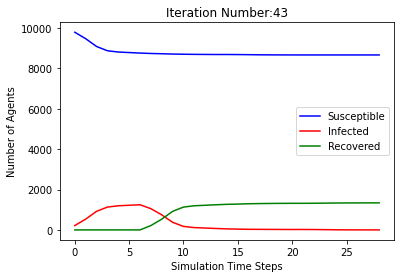

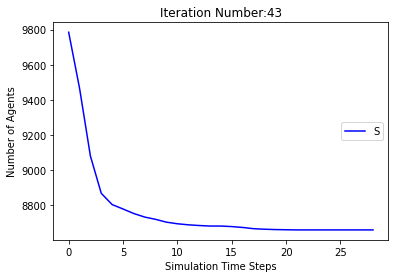

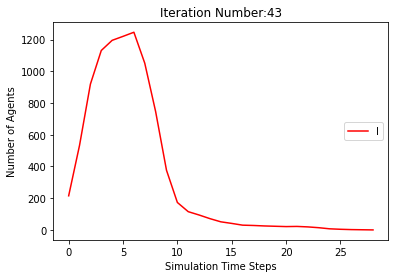

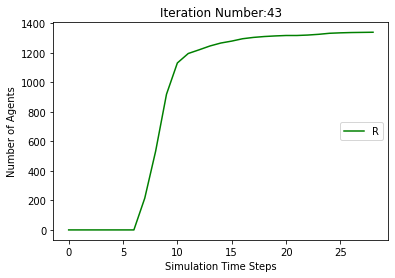

[9785, 9442, 9054, 8841, 8798, 8784, 8768, 8757, 8744, 8727, 8718, 8714, 8710, 8708, 8704, 8700, 8699, 8699, 8698, 8698, 8698, 8698, 8698, 8698, 8698, 8698]
[215, 558, 946, 1159, 1202, 1216, 1232, 1028, 698, 327, 123, 84, 74, 60, 53, 44, 28, 19, 16, 12, 10, 6, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 558, 946, 1159, 1202, 1216, 1232, 1243, 1256, 1273, 1282, 1286, 1290, 1292, 1296, 1300, 1301, 1301, 1302]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 

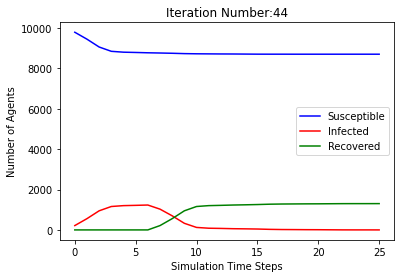

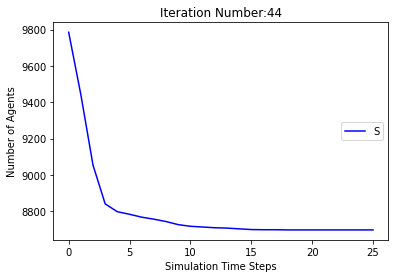

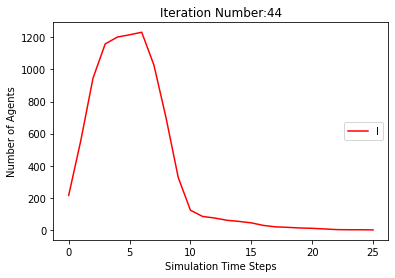

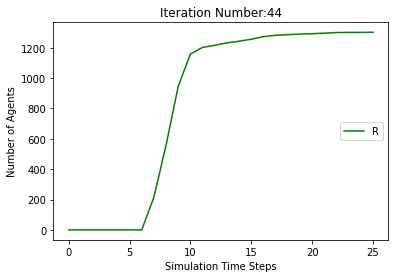

[9785, 9480, 9083, 8857, 8812, 8790, 8777, 8756, 8737, 8724, 8708, 8697, 8685, 8682, 8681, 8679, 8674, 8671, 8669, 8669, 8668, 8668, 8667, 8667, 8666, 8666, 8666, 8666, 8666, 8666, 8666, 8666]
[215, 520, 917, 1143, 1188, 1210, 1223, 1029, 743, 359, 149, 115, 105, 95, 75, 58, 50, 37, 28, 16, 14, 13, 12, 7, 5, 3, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 520, 917, 1143, 1188, 1210, 1223, 1244, 1263, 1276, 1292, 1303, 1315, 1318, 1319, 1321, 1326, 1329, 1331, 1331, 1332, 1332, 1333, 1333, 1334]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677

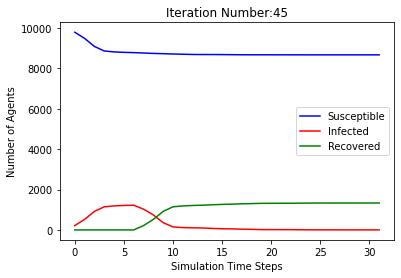

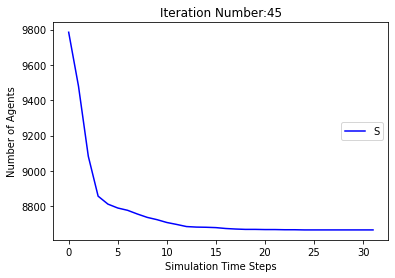

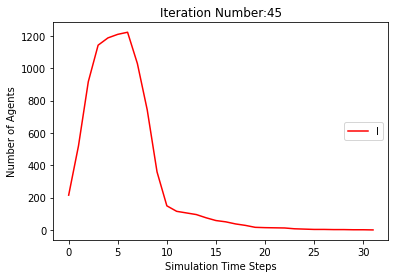

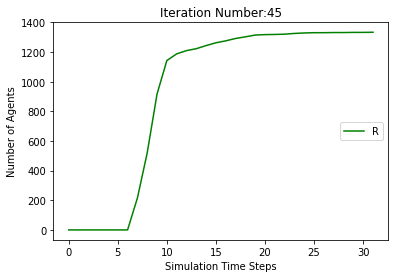

[9785, 9431, 9044, 8845, 8791, 8775, 8756, 8735, 8717, 8701, 8685, 8669, 8661, 8657, 8653, 8651, 8648, 8644, 8643, 8642, 8642, 8642, 8642, 8642, 8642, 8642, 8642]
[215, 569, 956, 1155, 1209, 1225, 1244, 1050, 714, 343, 160, 122, 114, 99, 82, 66, 53, 41, 26, 19, 15, 11, 9, 6, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 569, 956, 1155, 1209, 1225, 1244, 1265, 1283, 1299, 1315, 1331, 1339, 1343, 1347, 1349, 1352, 1356, 1357, 1358]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 

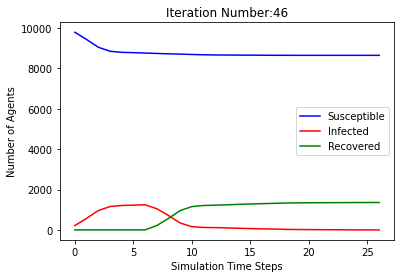

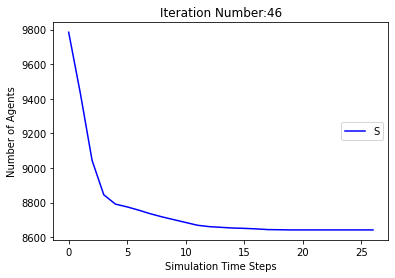

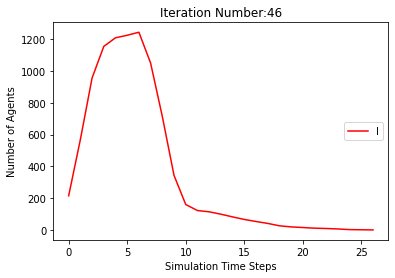

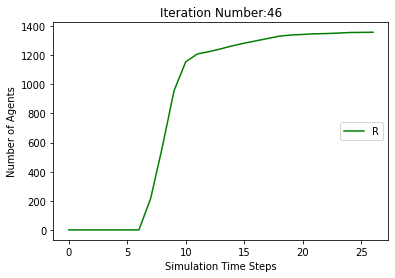

[9785, 9446, 9064, 8845, 8798, 8778, 8758, 8740, 8726, 8718, 8708, 8700, 8696, 8693, 8691, 8688, 8687, 8686, 8683, 8682, 8682, 8681, 8681, 8681, 8681, 8681, 8681, 8681, 8681]
[215, 554, 936, 1155, 1202, 1222, 1242, 1045, 720, 346, 137, 98, 82, 65, 49, 38, 31, 22, 17, 14, 11, 10, 7, 6, 5, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 554, 936, 1155, 1202, 1222, 1242, 1260, 1274, 1282, 1292, 1300, 1304, 1307, 1309, 1312, 1313, 1314, 1317, 1318, 1318, 1319]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 90

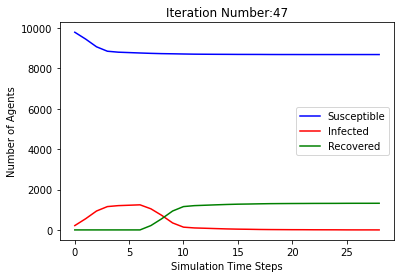

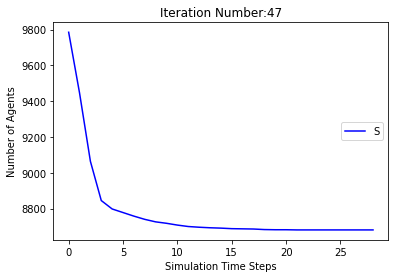

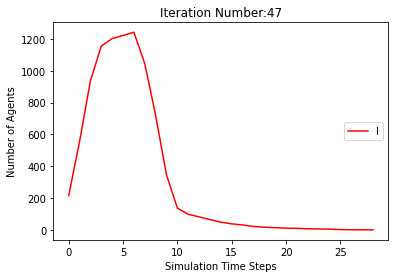

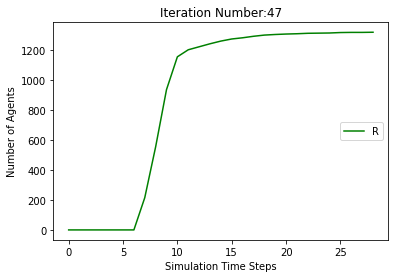

[9785, 9440, 9049, 8845, 8787, 8760, 8744, 8729, 8715, 8706, 8702, 8702, 8696, 8693, 8687, 8684, 8683, 8683, 8682, 8682, 8682, 8682, 8682, 8681, 8681, 8681, 8681, 8681, 8680, 8680, 8680, 8680, 8680, 8680, 8680, 8680]
[215, 560, 951, 1155, 1213, 1240, 1256, 1056, 725, 343, 143, 85, 64, 51, 42, 31, 23, 19, 20, 14, 11, 5, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 560, 951, 1155, 1213, 1240, 1256, 1271, 1285, 1294, 1298, 1298, 1304, 1307, 1313, 1316, 1317, 1317, 1318, 1318, 1318, 1318, 1318, 1319, 1319, 1319, 1319, 1319, 1320]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 86

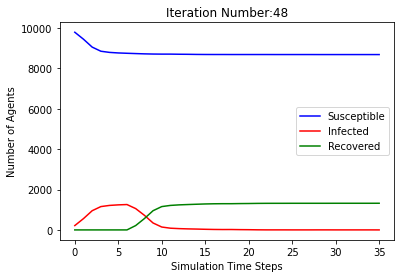

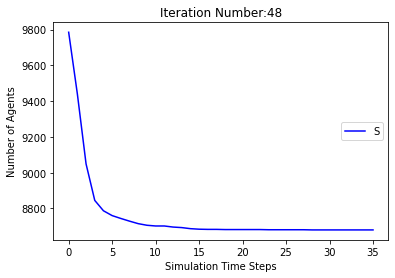

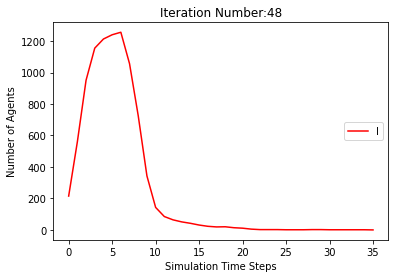

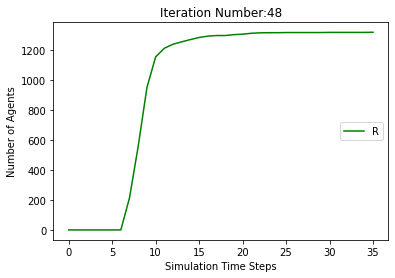

[9785, 9447, 9077, 8864, 8779, 8745, 8720, 8694, 8677, 8667, 8654, 8649, 8637, 8627, 8623, 8620, 8617, 8617, 8617, 8617, 8617, 8617, 8617, 8617]
[215, 553, 923, 1136, 1221, 1255, 1280, 1091, 770, 410, 210, 130, 108, 93, 71, 57, 50, 37, 32, 20, 10, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 553, 923, 1136, 1221, 1255, 1280, 1306, 1323, 1333, 1346, 1351, 1363, 1373, 1377, 1380, 1383]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642

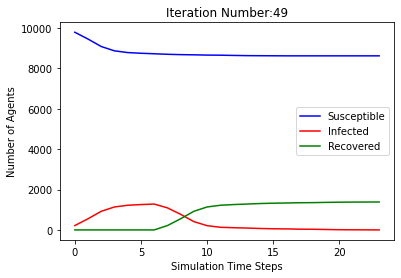

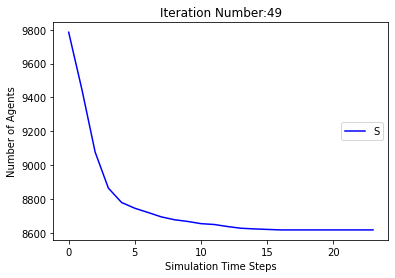

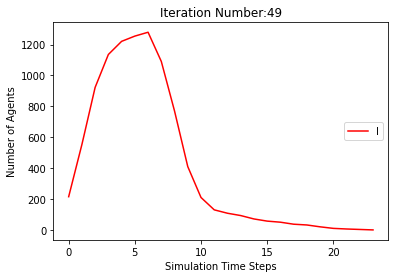

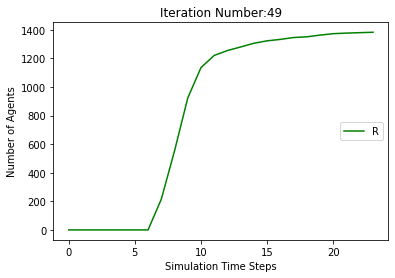

[9785, 9464, 9060, 8849, 8810, 8797, 8780, 8764, 8746, 8729, 8720, 8710, 8699, 8694, 8692, 8691, 8691, 8688, 8685, 8679, 8675, 8672, 8670, 8670, 8670, 8670, 8670, 8670, 8670, 8670]
[215, 536, 940, 1151, 1190, 1203, 1220, 1021, 718, 331, 129, 100, 98, 86, 72, 55, 38, 32, 25, 20, 19, 20, 21, 21, 18, 15, 9, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 536, 940, 1151, 1190, 1203, 1220, 1236, 1254, 1271, 1280, 1290, 1301, 1306, 1308, 1309, 1309, 1312, 1315, 1321, 1325, 1328, 1330]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 86

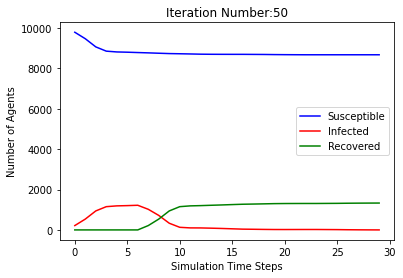

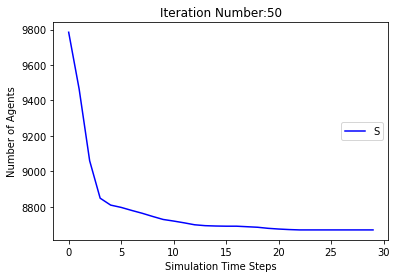

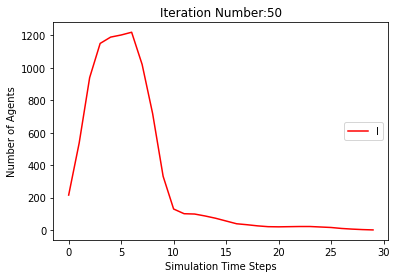

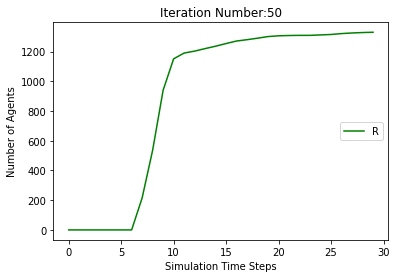

[9785, 9437, 9047, 8830, 8769, 8749, 8735, 8717, 8694, 8673, 8659, 8651, 8642, 8640, 8639, 8638, 8636, 8636, 8636, 8634, 8634, 8634, 8634, 8634, 8634, 8634, 8634]
[215, 563, 953, 1170, 1231, 1251, 1265, 1068, 743, 374, 171, 118, 107, 95, 78, 56, 37, 23, 15, 8, 6, 5, 4, 2, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 563, 953, 1170, 1231, 1251, 1265, 1283, 1306, 1327, 1341, 1349, 1358, 1360, 1361, 1362, 1364, 1364, 1364, 1366]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 872

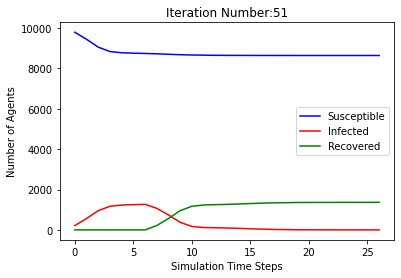

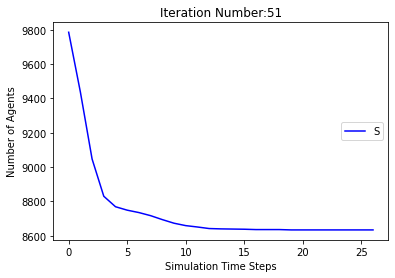

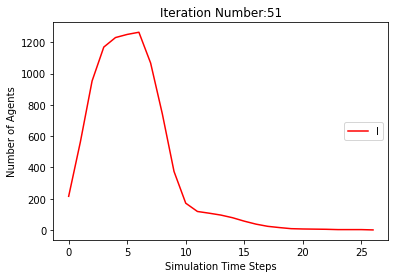

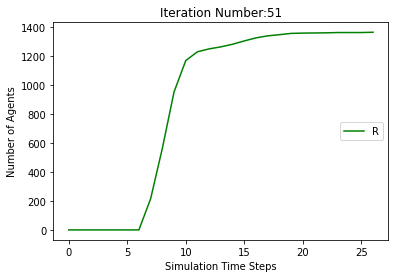

[9785, 9450, 9076, 8857, 8801, 8775, 8748, 8727, 8710, 8680, 8652, 8637, 8627, 8620, 8619, 8617, 8616, 8616, 8616, 8616, 8616, 8616, 8616, 8615, 8615, 8615, 8615, 8615, 8615, 8615, 8615]
[215, 550, 924, 1143, 1199, 1225, 1252, 1058, 740, 396, 205, 164, 148, 128, 108, 93, 64, 36, 21, 11, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 550, 924, 1143, 1199, 1225, 1252, 1273, 1290, 1320, 1348, 1363, 1373, 1380, 1381, 1383, 1384, 1384, 1384, 1384, 1384, 1384, 1384, 1385]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 86

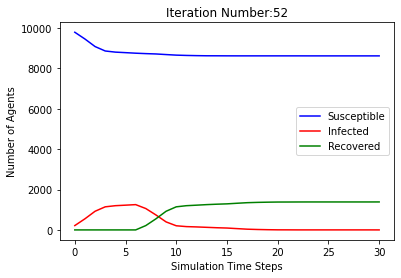

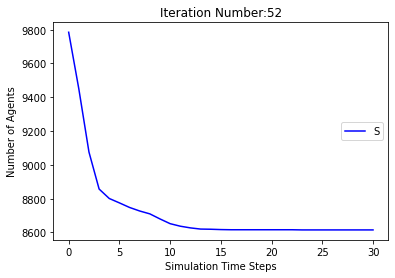

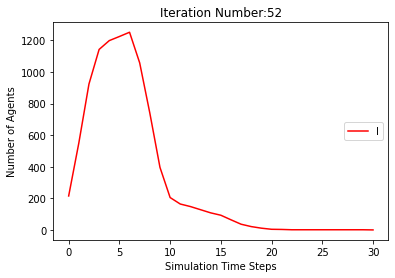

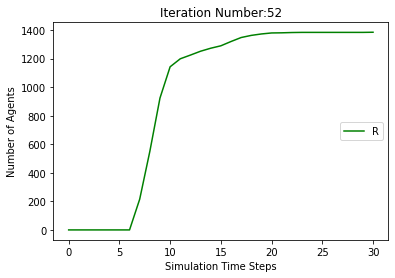

[9785, 9457, 9055, 8860, 8793, 8770, 8747, 8720, 8685, 8657, 8639, 8619, 8604, 8601, 8599, 8598, 8598, 8598, 8598, 8597, 8596, 8596, 8596, 8596, 8596, 8596, 8596, 8596]
[215, 543, 945, 1140, 1207, 1230, 1253, 1065, 772, 398, 221, 174, 166, 146, 121, 87, 59, 41, 21, 7, 5, 3, 2, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 543, 945, 1140, 1207, 1230, 1253, 1280, 1315, 1343, 1361, 1381, 1396, 1399, 1401, 1402, 1402, 1402, 1402, 1403, 1404]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773

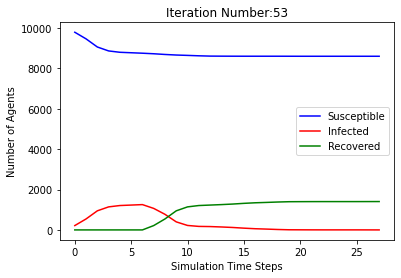

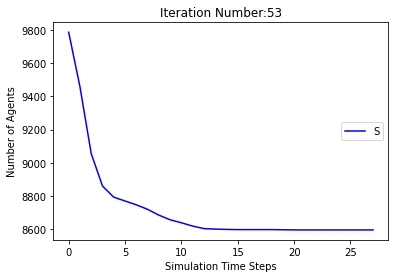

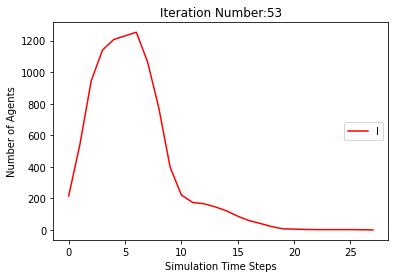

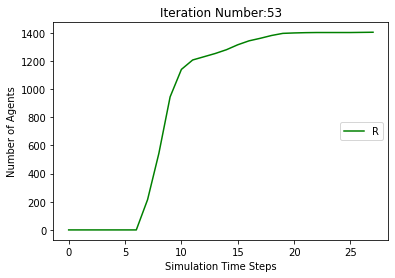

[9785, 9466, 9090, 8871, 8805, 8785, 8768, 8751, 8733, 8720, 8708, 8693, 8680, 8674, 8671, 8669, 8668, 8668, 8668, 8668, 8668, 8668, 8668, 8668]
[215, 534, 910, 1129, 1195, 1215, 1232, 1034, 733, 370, 163, 112, 105, 94, 80, 64, 52, 40, 25, 12, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 534, 910, 1129, 1195, 1215, 1232, 1249, 1267, 1280, 1292, 1307, 1320, 1326, 1329, 1331, 1332]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642,

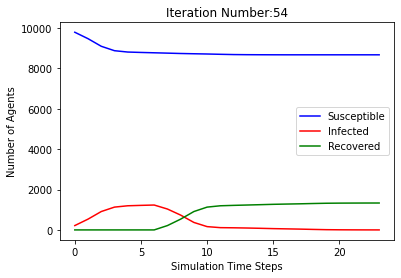

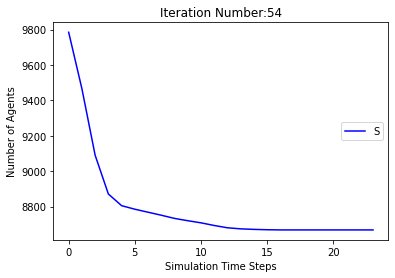

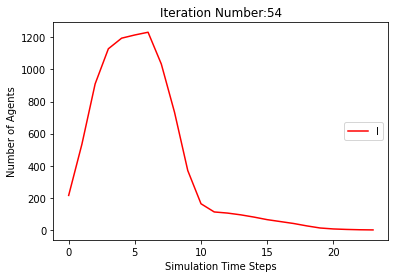

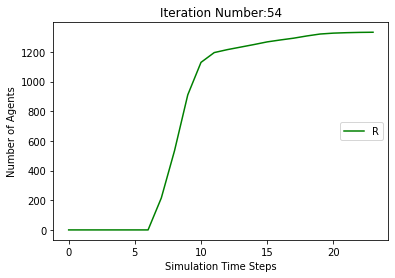

[9785, 9442, 9049, 8845, 8792, 8775, 8754, 8727, 8704, 8687, 8675, 8668, 8660, 8659, 8658, 8655, 8650, 8648, 8648, 8648, 8648, 8648, 8646, 8646, 8645, 8645, 8645, 8645, 8645, 8645, 8645, 8645]
[215, 558, 951, 1155, 1208, 1225, 1246, 1058, 738, 362, 170, 124, 115, 95, 69, 49, 37, 27, 20, 12, 11, 10, 9, 4, 3, 3, 3, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 558, 951, 1155, 1208, 1225, 1246, 1273, 1296, 1313, 1325, 1332, 1340, 1341, 1342, 1345, 1350, 1352, 1352, 1352, 1352, 1352, 1354, 1354, 1355]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677,

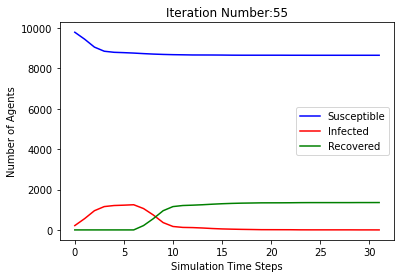

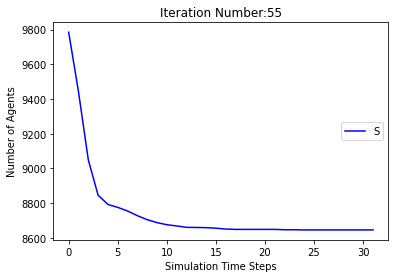

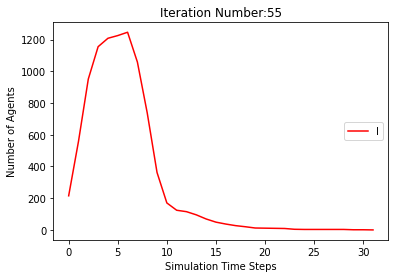

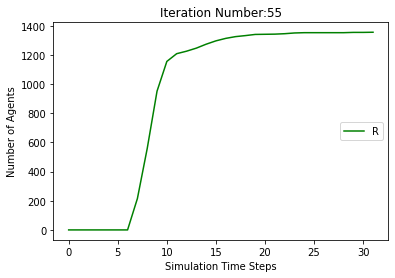

[9785, 9452, 9053, 8847, 8780, 8753, 8739, 8725, 8718, 8713, 8709, 8702, 8700, 8697, 8696, 8695, 8695, 8695, 8695, 8694, 8694, 8694, 8694, 8694, 8694, 8694, 8694]
[215, 548, 947, 1153, 1220, 1247, 1261, 1060, 734, 340, 138, 78, 53, 42, 29, 23, 18, 14, 7, 6, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 548, 947, 1153, 1220, 1247, 1261, 1275, 1282, 1287, 1291, 1298, 1300, 1303, 1304, 1305, 1305, 1305, 1305, 1306]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 

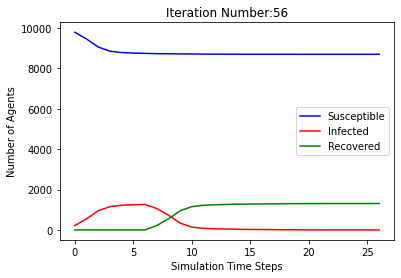

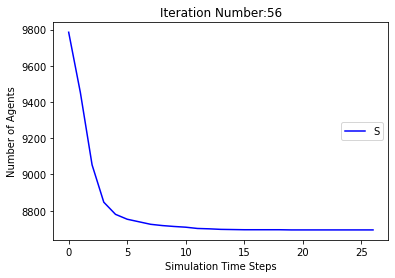

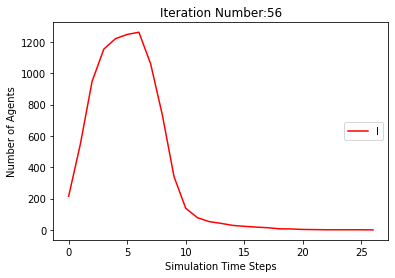

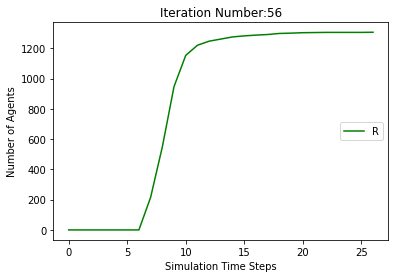

[9785, 9479, 9080, 8823, 8756, 8727, 8694, 8677, 8652, 8635, 8619, 8608, 8604, 8598, 8592, 8589, 8589, 8588, 8588, 8587, 8586, 8582, 8582, 8582, 8582, 8582, 8582, 8582, 8582]
[215, 521, 920, 1177, 1244, 1273, 1306, 1108, 827, 445, 204, 148, 123, 96, 85, 63, 46, 31, 20, 17, 12, 10, 7, 7, 6, 6, 5, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 521, 920, 1177, 1244, 1273, 1306, 1323, 1348, 1365, 1381, 1392, 1396, 1402, 1408, 1411, 1411, 1412, 1412, 1413, 1414, 1418]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 

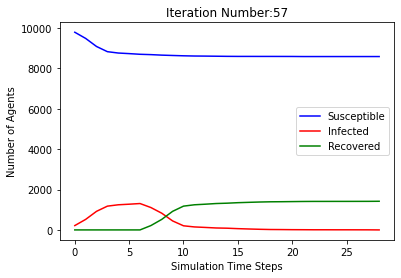

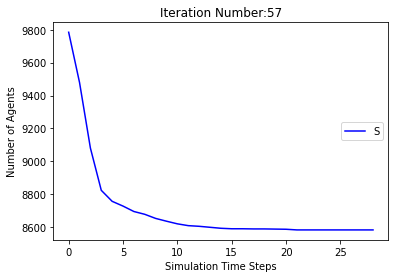

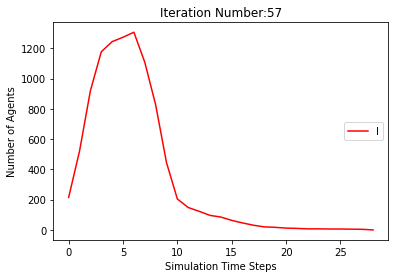

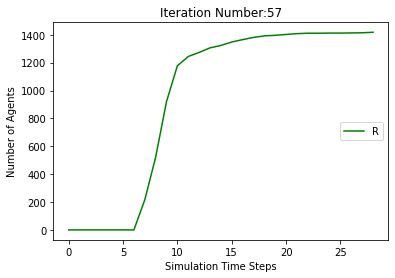

[9785, 9447, 9061, 8866, 8827, 8810, 8799, 8793, 8785, 8772, 8761, 8755, 8755, 8755, 8754, 8754, 8754, 8754, 8754, 8754, 8754, 8754]
[215, 553, 939, 1134, 1173, 1190, 1201, 992, 662, 289, 105, 72, 55, 44, 39, 31, 18, 7, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 553, 939, 1134, 1173, 1190, 1201, 1207, 1215, 1228, 1239, 1245, 1245, 1245, 1246]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 8640,

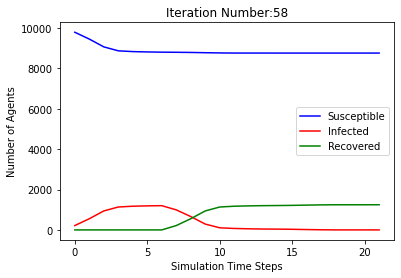

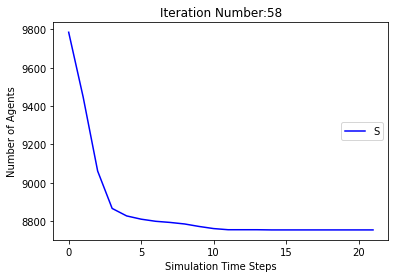

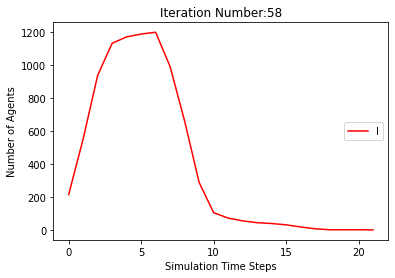

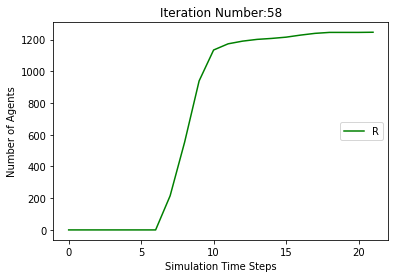

[9785, 9461, 9062, 8856, 8804, 8789, 8777, 8756, 8747, 8740, 8729, 8714, 8703, 8697, 8693, 8690, 8679, 8676, 8674, 8673, 8671, 8671, 8671, 8671, 8670, 8670, 8670, 8670, 8670, 8670, 8670, 8670]
[215, 539, 938, 1144, 1196, 1211, 1223, 1029, 714, 322, 127, 90, 86, 80, 63, 57, 61, 53, 40, 30, 26, 22, 19, 8, 6, 4, 3, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 539, 938, 1144, 1196, 1211, 1223, 1244, 1253, 1260, 1271, 1286, 1297, 1303, 1307, 1310, 1321, 1324, 1326, 1327, 1329, 1329, 1329, 1329, 1330]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 

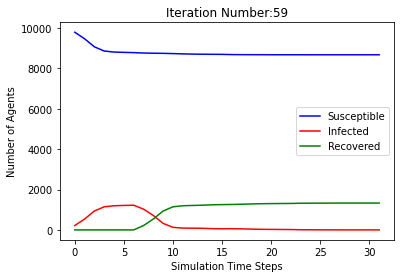

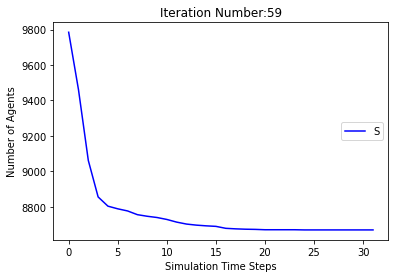

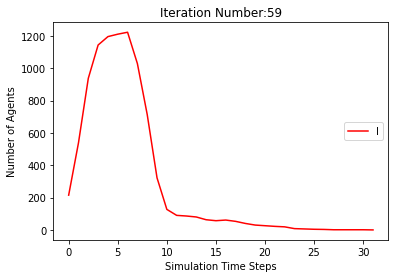

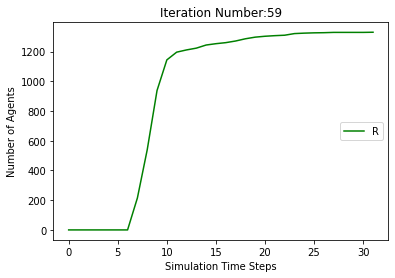

[9785, 9464, 9081, 8851, 8791, 8766, 8746, 8727, 8703, 8684, 8674, 8670, 8668, 8665, 8663, 8660, 8653, 8651, 8651, 8651, 8651, 8651, 8650, 8650, 8650, 8650, 8650, 8650, 8650, 8650]
[215, 536, 919, 1149, 1209, 1234, 1254, 1058, 761, 397, 177, 121, 98, 81, 64, 43, 31, 23, 19, 17, 14, 12, 10, 3, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 536, 919, 1149, 1209, 1234, 1254, 1273, 1297, 1316, 1326, 1330, 1332, 1335, 1337, 1340, 1347, 1349, 1349, 1349, 1349, 1349, 1350]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677]

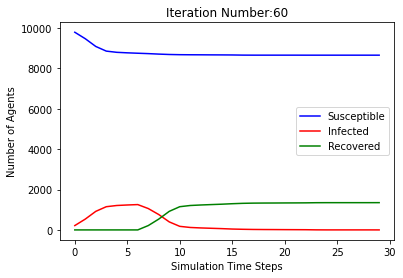

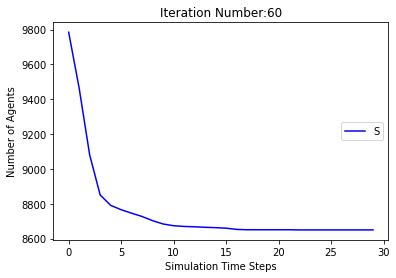

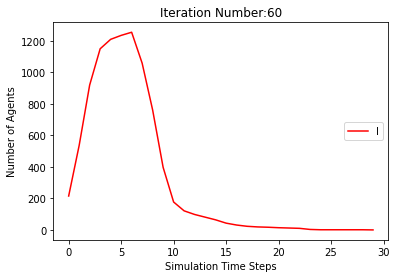

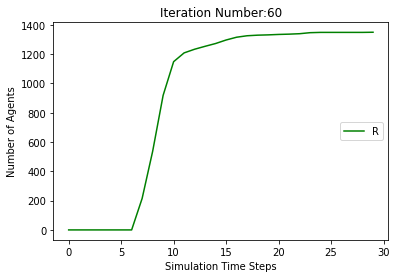

[9785, 9428, 9022, 8852, 8807, 8789, 8768, 8748, 8738, 8729, 8721, 8708, 8700, 8698, 8692, 8685, 8681, 8681, 8678, 8677, 8676, 8676, 8676, 8676, 8676, 8676, 8676, 8676]
[215, 572, 978, 1148, 1193, 1211, 1232, 1037, 690, 293, 131, 99, 89, 70, 56, 53, 48, 40, 30, 23, 22, 16, 9, 5, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 572, 978, 1148, 1193, 1211, 1232, 1252, 1262, 1271, 1279, 1292, 1300, 1302, 1308, 1315, 1319, 1319, 1322, 1323, 1324]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773,

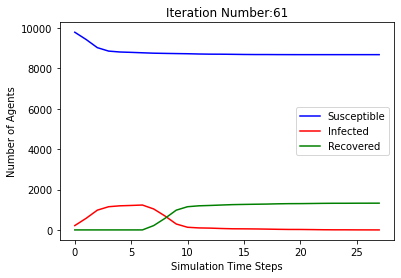

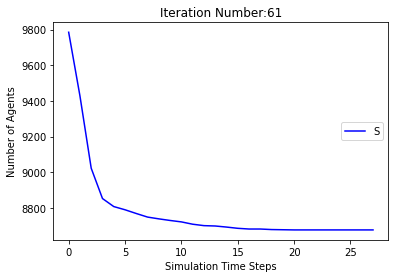

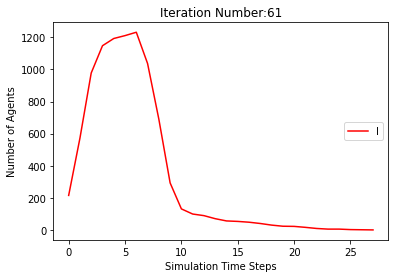

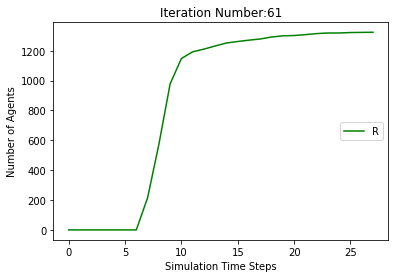

[9785, 9477, 9083, 8859, 8801, 8785, 8775, 8758, 8744, 8736, 8729, 8725, 8722, 8721, 8720, 8720, 8720, 8720, 8720, 8720, 8720, 8720]
[215, 523, 917, 1141, 1199, 1215, 1225, 1027, 733, 347, 130, 76, 63, 54, 38, 24, 16, 9, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 523, 917, 1141, 1199, 1215, 1225, 1242, 1256, 1264, 1271, 1275, 1278, 1279, 1280]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 8640

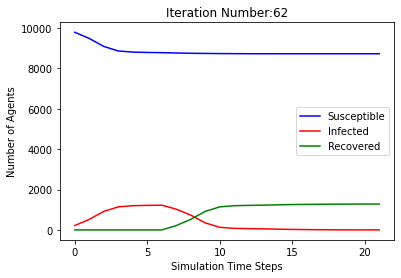

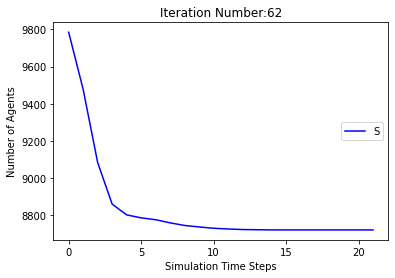

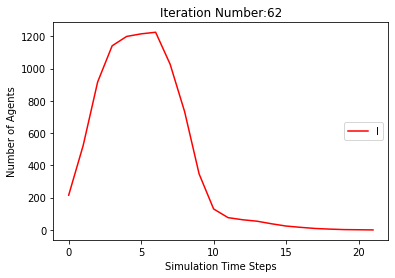

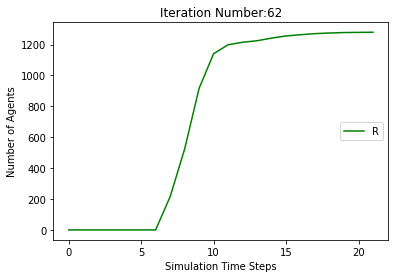

[9785, 9464, 9086, 8873, 8819, 8797, 8785, 8773, 8753, 8741, 8732, 8728, 8723, 8715, 8709, 8708, 8706, 8704, 8702, 8700, 8699, 8699, 8699, 8699, 8699, 8698, 8695, 8691, 8691, 8691, 8691, 8691, 8691, 8691, 8691]
[215, 536, 914, 1127, 1181, 1203, 1215, 1012, 711, 345, 141, 91, 74, 70, 64, 45, 35, 28, 26, 23, 16, 10, 9, 7, 5, 4, 5, 8, 8, 8, 8, 8, 7, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 536, 914, 1127, 1181, 1203, 1215, 1227, 1247, 1259, 1268, 1272, 1277, 1285, 1291, 1292, 1294, 1296, 1298, 1300, 1301, 1301, 1301, 1301, 1301, 1302, 1305, 1309]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679

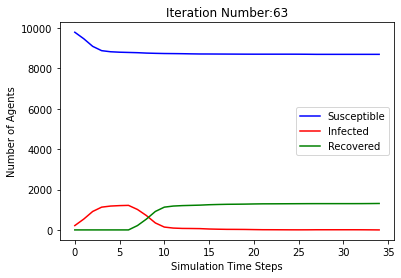

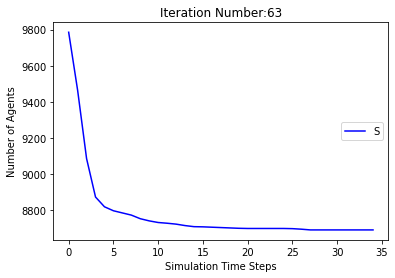

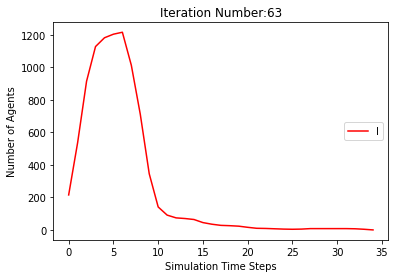

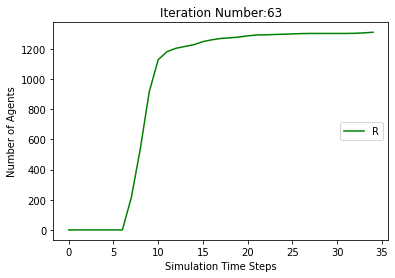

[9785, 9460, 9058, 8839, 8760, 8726, 8703, 8683, 8656, 8628, 8605, 8593, 8589, 8589, 8589, 8588, 8587, 8585, 8583, 8583, 8582, 8582, 8582, 8582, 8582, 8582, 8582, 8581, 8577, 8576, 8574, 8574, 8574, 8574, 8574, 8574, 8574, 8574]
[215, 540, 942, 1161, 1240, 1274, 1297, 1102, 804, 430, 234, 167, 137, 114, 94, 68, 41, 20, 10, 6, 7, 7, 6, 5, 3, 1, 1, 1, 5, 6, 8, 8, 8, 8, 7, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 540, 942, 1161, 1240, 1274, 1297, 1317, 1344, 1372, 1395, 1407, 1411, 1411, 1411, 1412, 1413, 1415, 1417, 1417, 1418, 1418, 1418, 1418, 1418, 1418, 1418, 1419, 1423, 1424, 1426]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8

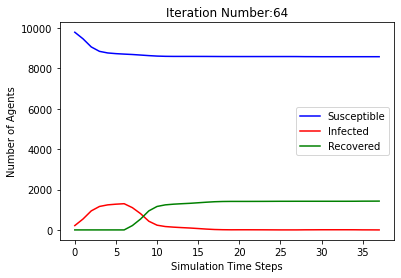

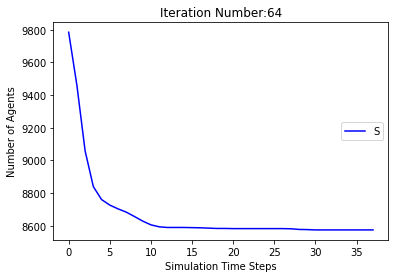

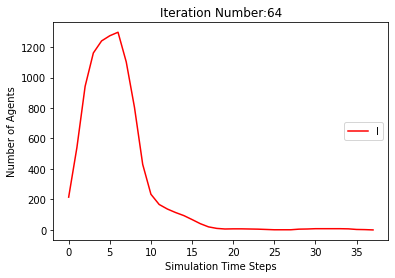

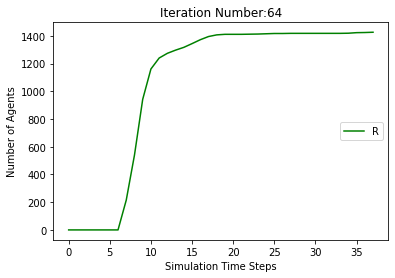

[9785, 9463, 9060, 8861, 8793, 8759, 8737, 8719, 8707, 8696, 8688, 8678, 8673, 8672, 8672, 8672, 8672, 8672, 8672, 8672, 8672]
[215, 537, 940, 1139, 1207, 1241, 1263, 1066, 756, 364, 173, 115, 86, 65, 47, 35, 24, 16, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 537, 940, 1139, 1207, 1241, 1263, 1281, 1293, 1304, 1312, 1322, 1327, 1328]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 8640, 8640, 8640,

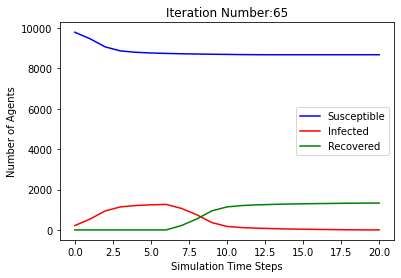

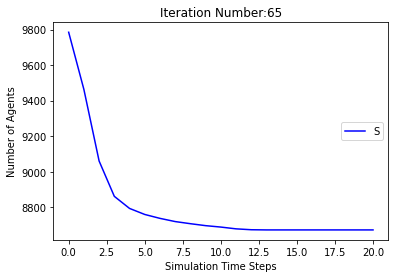

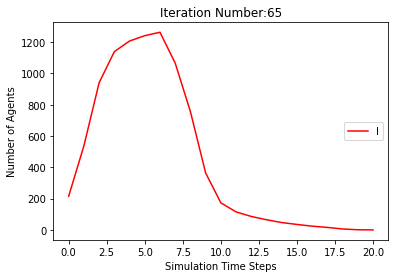

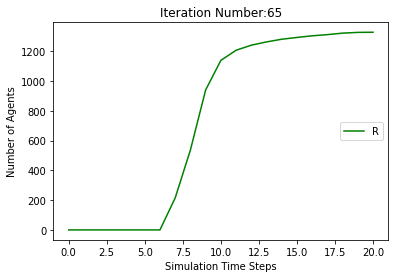

[9785, 9454, 9080, 8875, 8816, 8800, 8784, 8765, 8747, 8727, 8718, 8713, 8710, 8709, 8708, 8708, 8708, 8708, 8708, 8708, 8708, 8708]
[215, 546, 920, 1125, 1184, 1200, 1216, 1020, 707, 353, 157, 103, 90, 75, 57, 39, 19, 10, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 546, 920, 1125, 1184, 1200, 1216, 1235, 1253, 1273, 1282, 1287, 1290, 1291, 1292]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 86

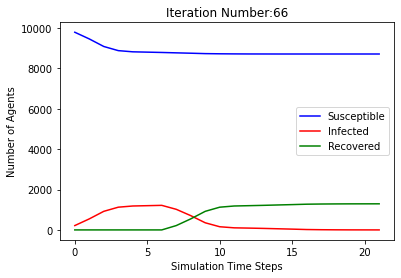

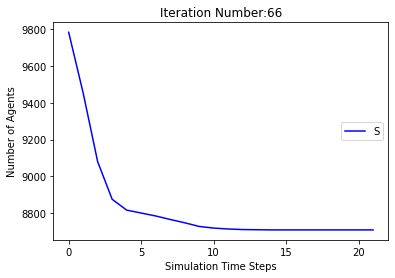

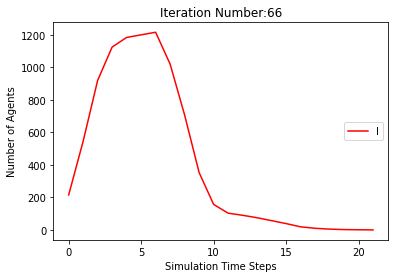

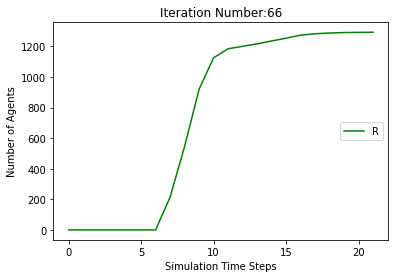

[9785, 9455, 9092, 8882, 8802, 8781, 8768, 8743, 8731, 8718, 8707, 8692, 8683, 8676, 8675, 8675, 8674, 8674, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673]
[215, 545, 908, 1118, 1198, 1219, 1232, 1042, 724, 374, 175, 110, 98, 92, 68, 56, 44, 33, 19, 10, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 545, 908, 1118, 1198, 1219, 1232, 1257, 1269, 1282, 1293, 1308, 1317, 1324, 1325, 1325, 1326, 1326, 1327]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 

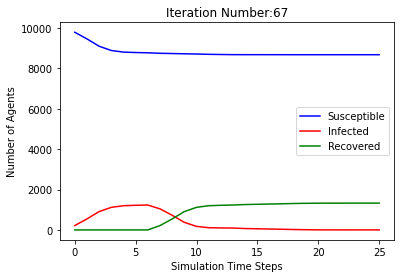

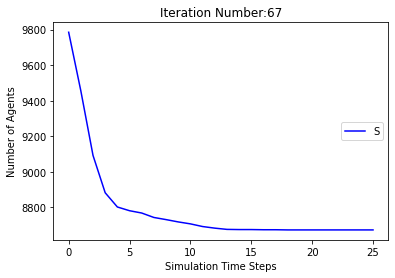

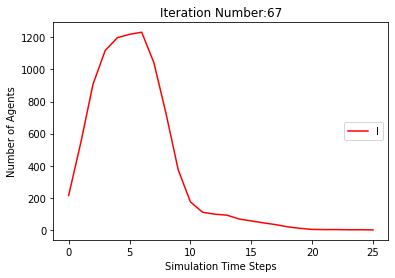

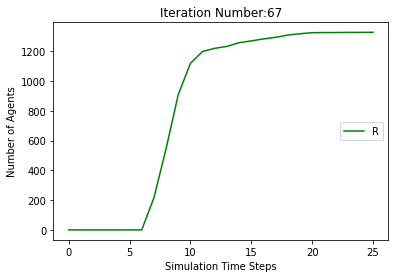

[9785, 9437, 9046, 8865, 8812, 8800, 8792, 8778, 8761, 8748, 8739, 8731, 8723, 8720, 8713, 8707, 8706, 8705, 8701, 8700, 8700, 8700, 8700, 8700, 8700, 8700, 8700]
[215, 563, 954, 1135, 1188, 1200, 1208, 1007, 676, 298, 126, 81, 77, 72, 65, 54, 42, 34, 30, 23, 20, 13, 7, 6, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 563, 954, 1135, 1188, 1200, 1208, 1222, 1239, 1252, 1261, 1269, 1277, 1280, 1287, 1293, 1294, 1295, 1299, 1300]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 87

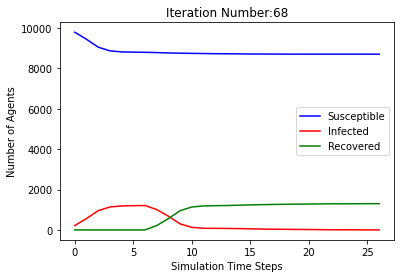

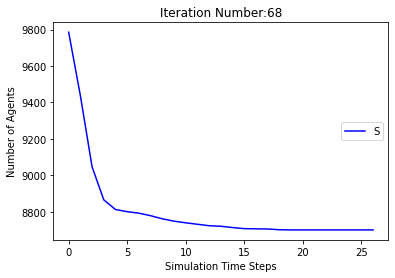

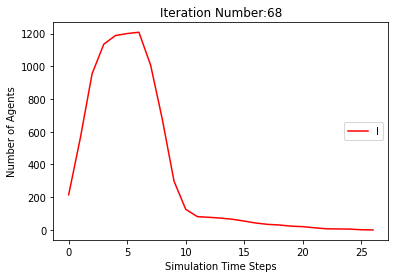

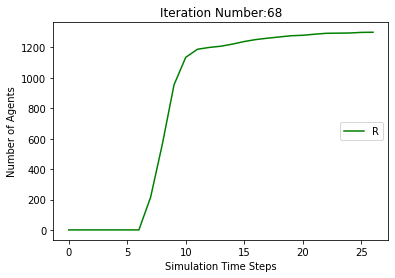

[9785, 9442, 9053, 8868, 8806, 8792, 8768, 8750, 8727, 8712, 8697, 8689, 8684, 8680, 8676, 8669, 8661, 8657, 8656, 8656, 8656, 8656, 8656, 8656, 8656, 8656]
[215, 558, 947, 1132, 1194, 1208, 1232, 1035, 715, 341, 171, 117, 108, 88, 74, 58, 51, 40, 33, 28, 24, 20, 13, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 558, 947, 1132, 1194, 1208, 1232, 1250, 1273, 1288, 1303, 1311, 1316, 1320, 1324, 1331, 1339, 1343, 1344]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 86

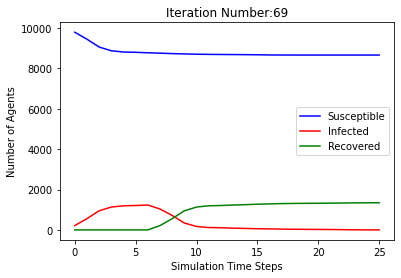

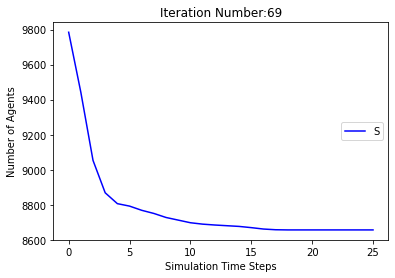

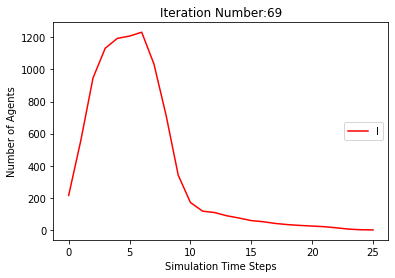

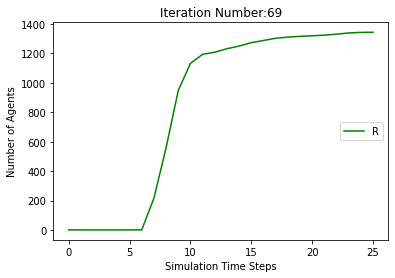

[9785, 9445, 9063, 8859, 8799, 8783, 8768, 8758, 8746, 8729, 8711, 8696, 8685, 8679, 8677, 8677, 8677, 8675, 8673, 8670, 8669, 8669, 8669, 8669, 8669, 8669, 8669, 8669]
[215, 555, 937, 1141, 1201, 1217, 1232, 1027, 699, 334, 148, 103, 98, 89, 81, 69, 52, 36, 23, 15, 10, 8, 8, 8, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 555, 937, 1141, 1201, 1217, 1232, 1242, 1254, 1271, 1289, 1304, 1315, 1321, 1323, 1323, 1323, 1325, 1327, 1330, 1331]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773,

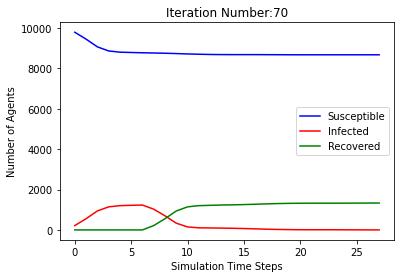

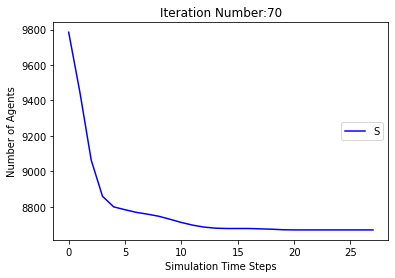

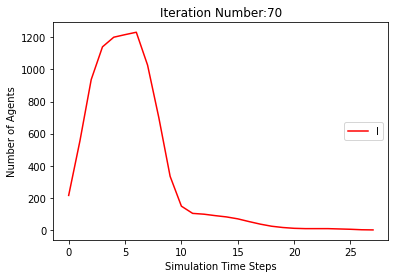

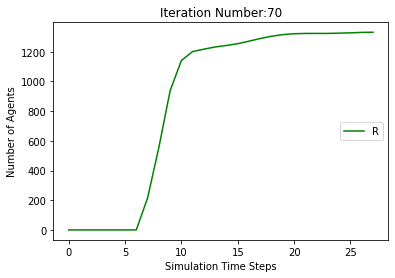

[9785, 9440, 9062, 8860, 8800, 8788, 8782, 8771, 8753, 8741, 8738, 8735, 8730, 8729, 8728, 8727, 8726, 8726, 8725, 8725, 8725, 8725, 8725, 8725, 8725, 8725]
[215, 560, 938, 1140, 1200, 1212, 1218, 1014, 687, 321, 122, 65, 58, 53, 43, 26, 15, 12, 10, 5, 4, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 560, 938, 1140, 1200, 1212, 1218, 1229, 1247, 1259, 1262, 1265, 1270, 1271, 1272, 1273, 1274, 1274, 1275]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 86

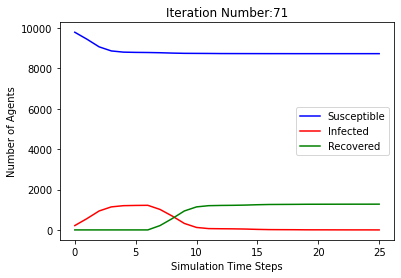

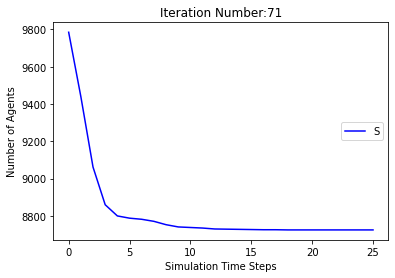

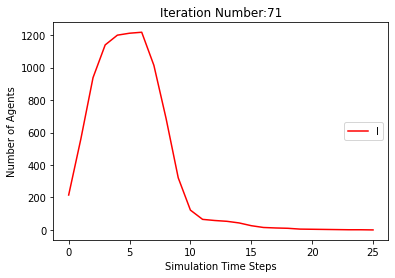

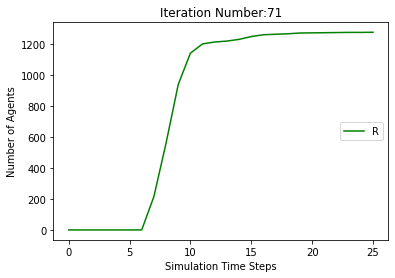

[9785, 9459, 9074, 8875, 8805, 8783, 8762, 8734, 8705, 8681, 8655, 8642, 8636, 8633, 8632, 8629, 8628, 8626, 8624, 8624, 8624, 8624, 8624, 8624, 8624, 8624]
[215, 541, 926, 1125, 1195, 1217, 1238, 1051, 754, 393, 220, 163, 147, 129, 102, 76, 53, 29, 18, 12, 9, 8, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 541, 926, 1125, 1195, 1217, 1238, 1266, 1295, 1319, 1345, 1358, 1364, 1367, 1368, 1371, 1372, 1374, 1376]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 868

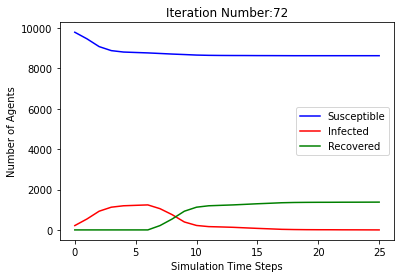

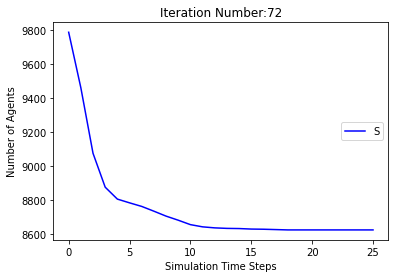

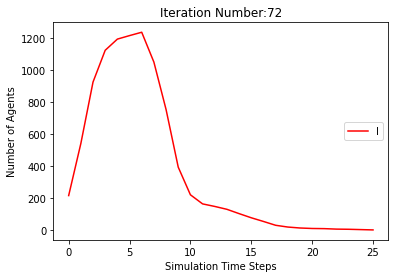

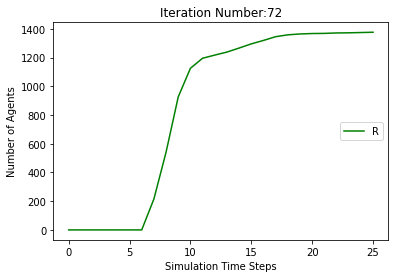

[9785, 9461, 9096, 8881, 8808, 8792, 8780, 8767, 8757, 8751, 8745, 8742, 8741, 8739, 8737, 8735, 8733, 8730, 8726, 8724, 8723, 8723, 8723, 8723, 8723, 8723, 8723, 8723]
[215, 539, 904, 1119, 1192, 1208, 1220, 1018, 704, 345, 136, 66, 51, 41, 30, 22, 18, 15, 16, 17, 16, 14, 12, 10, 7, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 539, 904, 1119, 1192, 1208, 1220, 1233, 1243, 1249, 1255, 1258, 1259, 1261, 1263, 1265, 1267, 1270, 1274, 1276, 1277]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 877

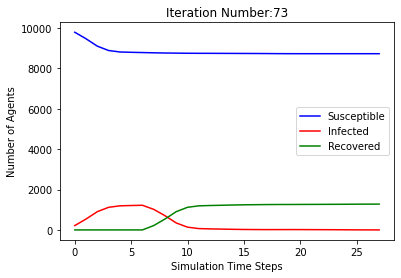

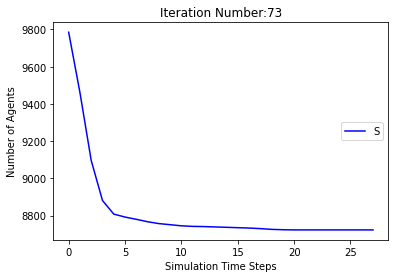

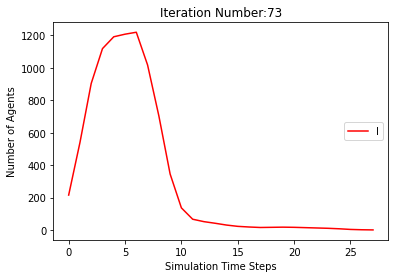

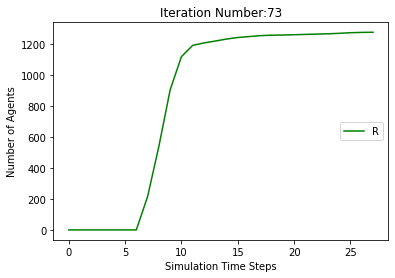

[9785, 9453, 9071, 8854, 8794, 8775, 8764, 8755, 8748, 8731, 8717, 8707, 8701, 8699, 8698, 8698, 8698, 8698, 8698, 8698, 8698, 8698]
[215, 547, 929, 1146, 1206, 1225, 1236, 1030, 705, 340, 137, 87, 74, 65, 57, 50, 33, 19, 9, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 547, 929, 1146, 1206, 1225, 1236, 1245, 1252, 1269, 1283, 1293, 1299, 1301, 1302]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 864

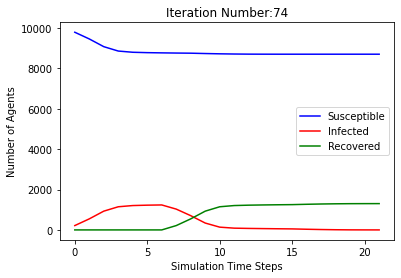

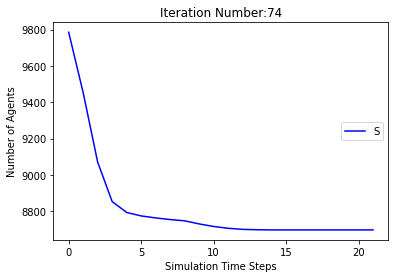

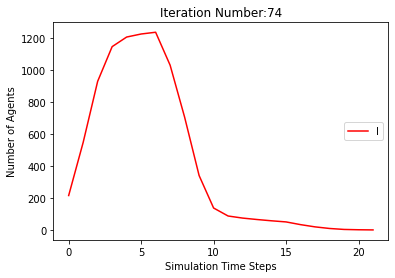

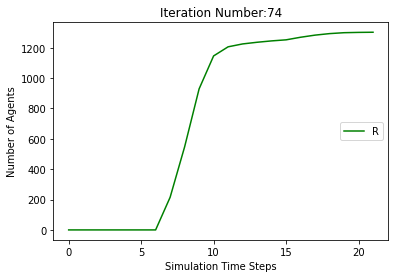

[9785, 9453, 9073, 8870, 8827, 8812, 8797, 8778, 8742, 8713, 8699, 8693, 8689, 8687, 8685, 8684, 8684, 8683, 8679, 8676, 8674, 8669, 8669, 8669, 8669, 8669, 8669, 8669, 8669]
[215, 547, 927, 1130, 1173, 1188, 1203, 1007, 711, 360, 171, 134, 123, 110, 93, 58, 29, 16, 14, 13, 13, 16, 15, 15, 14, 10, 7, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 547, 927, 1130, 1173, 1188, 1203, 1222, 1258, 1287, 1301, 1307, 1311, 1313, 1315, 1316, 1316, 1317, 1321, 1324, 1326, 1331]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9

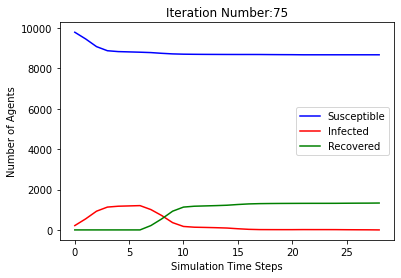

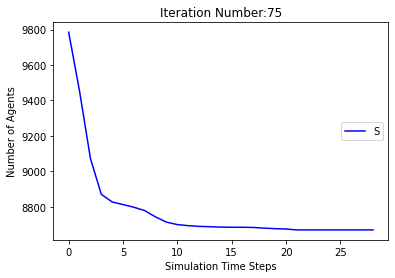

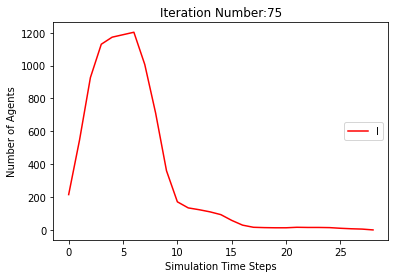

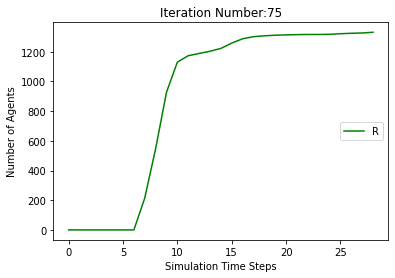

[9785, 9461, 9074, 8850, 8786, 8766, 8753, 8734, 8713, 8690, 8669, 8647, 8639, 8633, 8629, 8624, 8620, 8620, 8620, 8620, 8620, 8619, 8619, 8619, 8619, 8619, 8619, 8619, 8619]
[215, 539, 926, 1150, 1214, 1234, 1247, 1051, 748, 384, 181, 139, 127, 120, 105, 89, 70, 49, 27, 19, 13, 10, 5, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 539, 926, 1150, 1214, 1234, 1247, 1266, 1287, 1310, 1331, 1353, 1361, 1367, 1371, 1376, 1380, 1380, 1380, 1380, 1380, 1381]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418

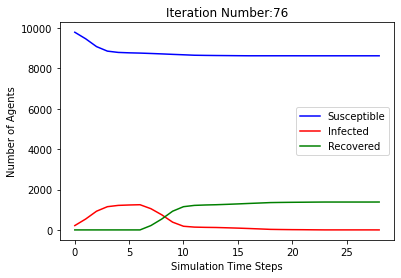

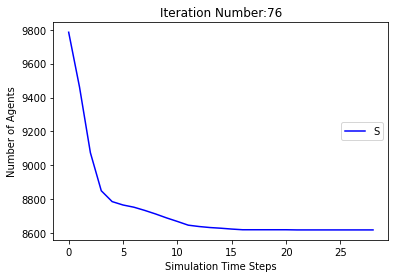

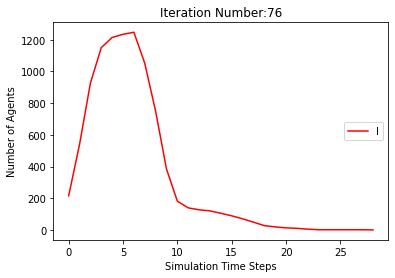

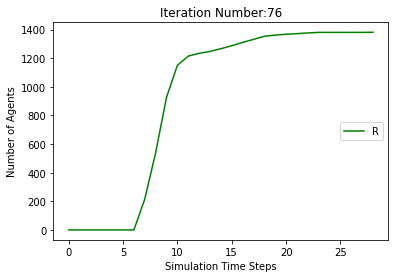

[9785, 9454, 9074, 8851, 8793, 8777, 8763, 8745, 8732, 8715, 8704, 8689, 8670, 8665, 8662, 8652, 8645, 8640, 8637, 8637, 8637, 8637, 8636, 8636, 8636, 8636, 8636, 8636, 8636, 8636]
[215, 546, 926, 1149, 1207, 1223, 1237, 1040, 722, 359, 147, 104, 107, 98, 83, 80, 70, 64, 52, 33, 28, 25, 16, 9, 4, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 546, 926, 1149, 1207, 1223, 1237, 1255, 1268, 1285, 1296, 1311, 1330, 1335, 1338, 1348, 1355, 1360, 1363, 1363, 1363, 1363, 1364]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677

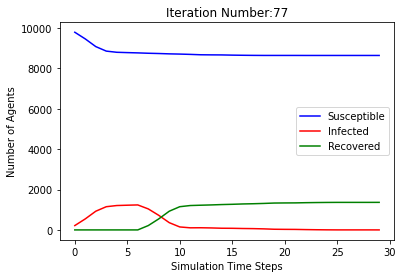

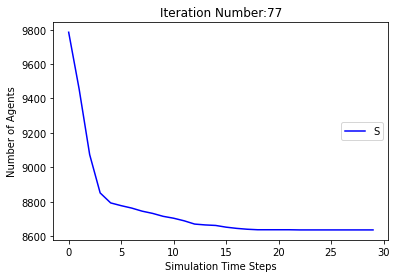

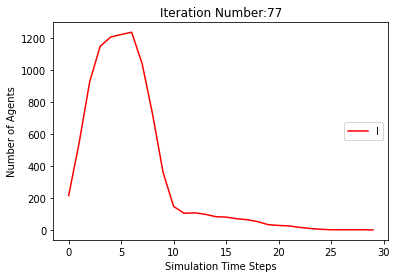

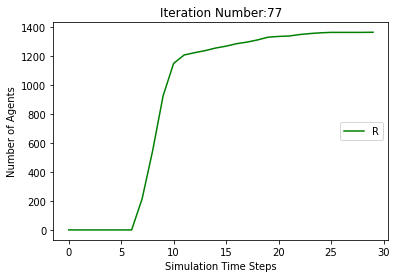

[9785, 9455, 9075, 8852, 8794, 8762, 8719, 8682, 8667, 8645, 8625, 8614, 8609, 8608, 8602, 8600, 8599, 8599, 8599, 8595, 8594, 8593, 8593, 8593, 8593, 8593, 8593, 8593, 8593]
[215, 545, 925, 1148, 1206, 1238, 1281, 1103, 788, 430, 227, 180, 153, 111, 80, 67, 46, 26, 15, 14, 14, 9, 7, 6, 6, 6, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 545, 925, 1148, 1206, 1238, 1281, 1318, 1333, 1355, 1375, 1386, 1391, 1392, 1398, 1400, 1401, 1401, 1401, 1405, 1406, 1407]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 

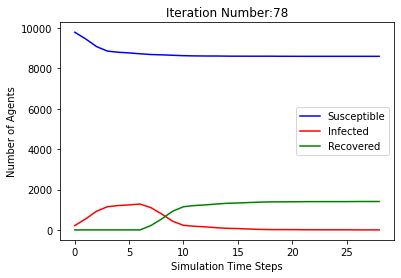

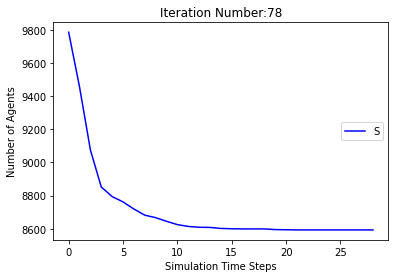

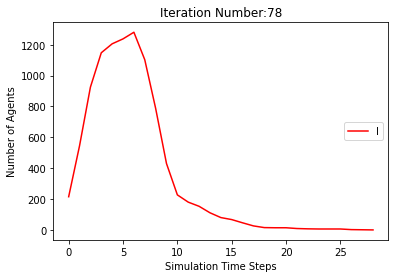

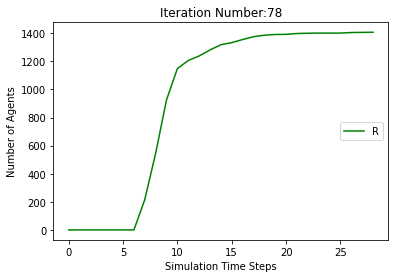

[9785, 9459, 9060, 8856, 8790, 8754, 8726, 8708, 8698, 8684, 8674, 8661, 8656, 8654, 8652, 8648, 8645, 8641, 8641, 8641, 8641, 8641, 8641, 8641, 8641]
[215, 541, 940, 1144, 1210, 1246, 1274, 1077, 761, 376, 182, 129, 98, 72, 56, 50, 39, 33, 20, 15, 13, 11, 7, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 541, 940, 1144, 1210, 1246, 1274, 1292, 1302, 1316, 1326, 1339, 1344, 1346, 1348, 1352, 1355, 1359]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8

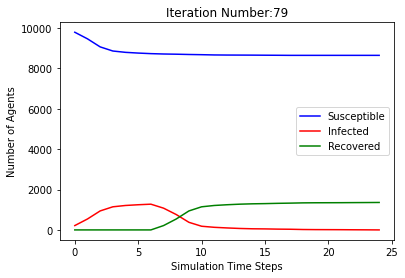

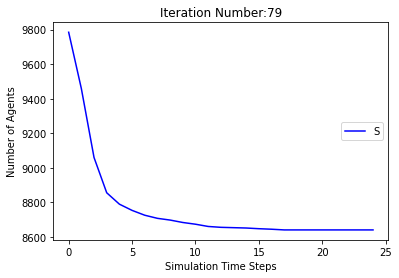

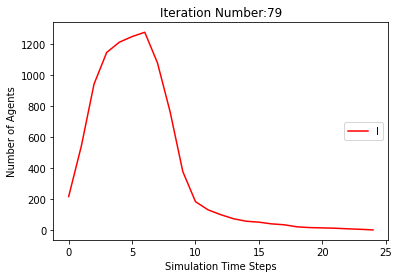

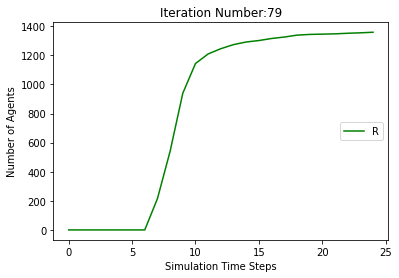

[9785, 9480, 9091, 8865, 8807, 8796, 8783, 8764, 8747, 8730, 8716, 8708, 8699, 8695, 8691, 8690, 8689, 8689, 8688, 8688, 8688, 8688, 8688, 8688, 8688, 8688]
[215, 520, 909, 1135, 1193, 1204, 1217, 1021, 733, 361, 149, 99, 97, 88, 73, 57, 41, 27, 20, 11, 7, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 520, 909, 1135, 1193, 1204, 1217, 1236, 1253, 1270, 1284, 1292, 1301, 1305, 1309, 1310, 1311, 1311, 1312]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8

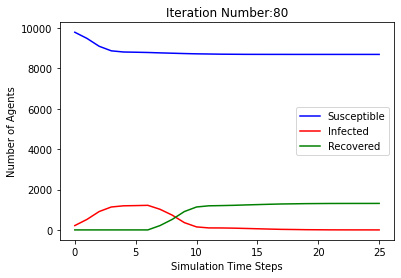

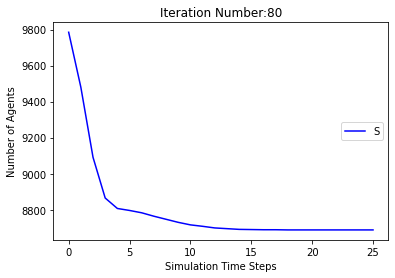

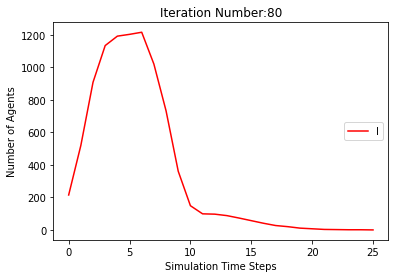

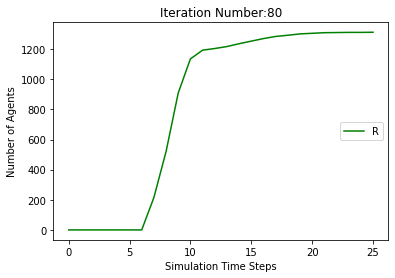

[9785, 9462, 9080, 8862, 8801, 8770, 8750, 8731, 8708, 8691, 8681, 8675, 8672, 8671, 8670, 8670, 8669, 8667, 8662, 8660, 8658, 8656, 8653, 8652, 8652, 8652, 8652, 8652, 8652, 8652, 8652]
[215, 538, 920, 1138, 1199, 1230, 1250, 1054, 754, 389, 181, 126, 98, 79, 61, 38, 22, 14, 13, 12, 13, 14, 17, 17, 15, 10, 8, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 538, 920, 1138, 1199, 1230, 1250, 1269, 1292, 1309, 1319, 1325, 1328, 1329, 1330, 1330, 1331, 1333, 1338, 1340, 1342, 1344, 1347, 1348]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677,

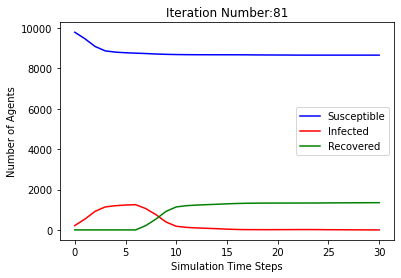

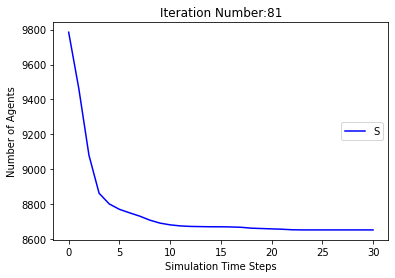

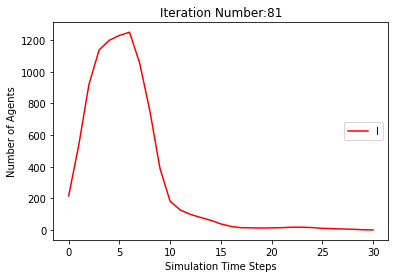

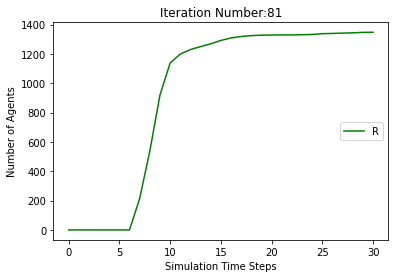

[9785, 9462, 9059, 8862, 8796, 8781, 8759, 8737, 8715, 8700, 8692, 8682, 8673, 8670, 8665, 8656, 8654, 8653, 8649, 8645, 8642, 8642, 8642, 8642, 8642, 8642, 8642, 8642]
[215, 538, 941, 1138, 1204, 1219, 1241, 1048, 747, 359, 170, 114, 108, 89, 72, 59, 46, 39, 33, 28, 28, 23, 14, 12, 11, 7, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 538, 941, 1138, 1204, 1219, 1241, 1263, 1285, 1300, 1308, 1318, 1327, 1330, 1335, 1344, 1346, 1347, 1351, 1355, 1358]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 

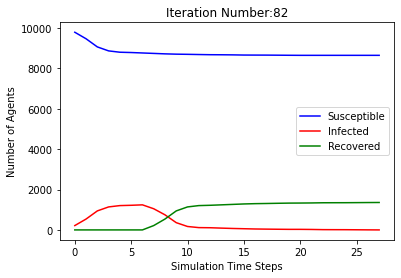

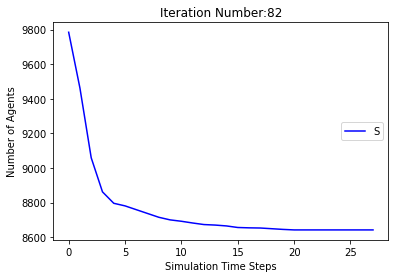

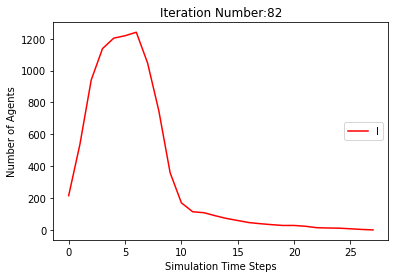

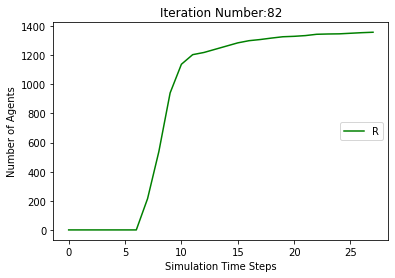

[9785, 9437, 9041, 8856, 8798, 8769, 8745, 8726, 8702, 8692, 8686, 8681, 8677, 8674, 8672, 8672, 8672, 8672, 8672, 8672, 8672, 8672]
[215, 563, 959, 1144, 1202, 1231, 1255, 1059, 735, 349, 170, 117, 92, 71, 54, 30, 20, 14, 9, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 563, 959, 1144, 1202, 1231, 1255, 1274, 1298, 1308, 1314, 1319, 1323, 1326, 1328]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 86

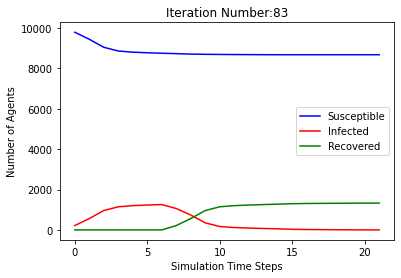

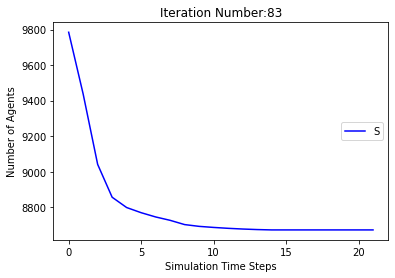

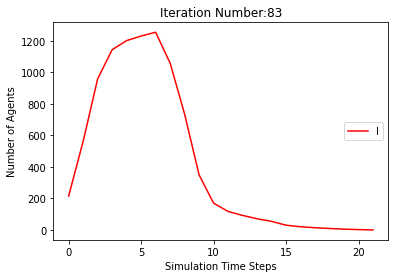

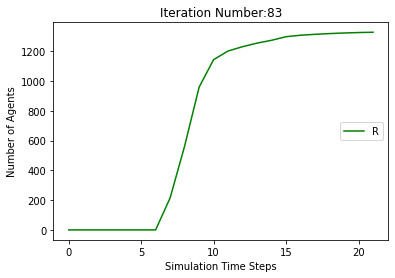

[9785, 9429, 9045, 8856, 8803, 8789, 8777, 8766, 8744, 8716, 8704, 8697, 8690, 8686, 8682, 8677, 8674, 8671, 8671, 8671, 8671, 8671, 8669, 8667, 8664, 8664, 8664, 8664, 8664, 8664, 8664, 8664]
[215, 571, 955, 1144, 1197, 1211, 1223, 1019, 685, 329, 152, 106, 99, 91, 84, 67, 42, 33, 26, 19, 15, 11, 8, 7, 7, 7, 7, 7, 7, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 571, 955, 1144, 1197, 1211, 1223, 1234, 1256, 1284, 1296, 1303, 1310, 1314, 1318, 1323, 1326, 1329, 1329, 1329, 1329, 1329, 1331, 1333, 1336]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 

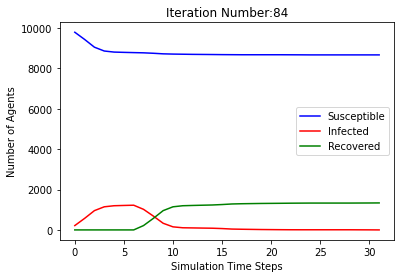

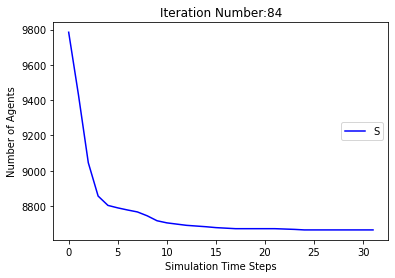

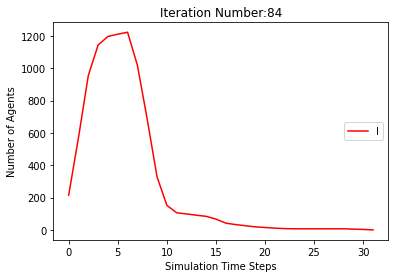

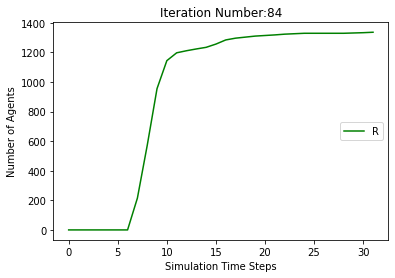

[9785, 9452, 9073, 8869, 8794, 8760, 8747, 8739, 8728, 8716, 8705, 8690, 8688, 8685, 8684, 8681, 8679, 8679, 8679, 8678, 8678, 8678, 8678, 8678, 8678, 8678, 8678]
[215, 548, 927, 1131, 1206, 1240, 1253, 1046, 724, 357, 164, 104, 72, 62, 55, 47, 37, 26, 11, 10, 7, 6, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 548, 927, 1131, 1206, 1240, 1253, 1261, 1272, 1284, 1295, 1310, 1312, 1315, 1316, 1319, 1321, 1321, 1321, 1322]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 872

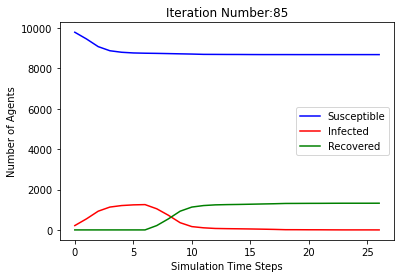

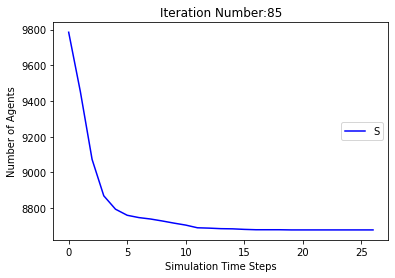

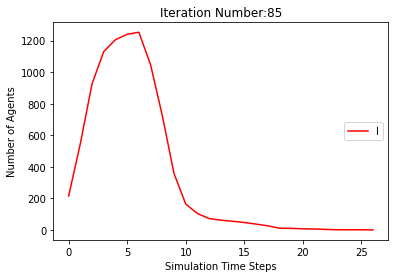

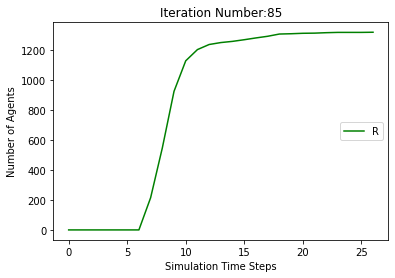

[9785, 9430, 9028, 8832, 8760, 8739, 8724, 8703, 8683, 8673, 8661, 8655, 8647, 8641, 8635, 8635, 8635, 8635, 8635, 8635, 8634, 8634, 8634, 8634, 8634, 8634, 8634, 8634]
[215, 570, 972, 1168, 1240, 1261, 1276, 1082, 747, 355, 171, 105, 92, 83, 68, 48, 38, 26, 20, 12, 7, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 570, 972, 1168, 1240, 1261, 1276, 1297, 1317, 1327, 1339, 1345, 1353, 1359, 1365, 1365, 1365, 1365, 1365, 1365, 1366]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 

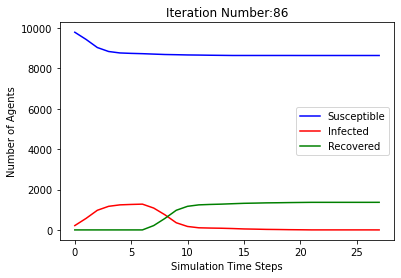

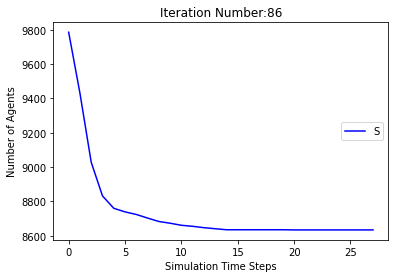

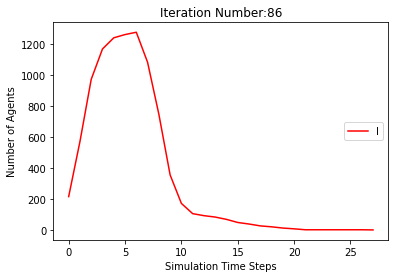

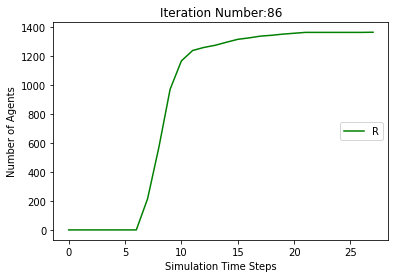

[9785, 9463, 9089, 8866, 8780, 8761, 8750, 8740, 8734, 8723, 8718, 8717, 8711, 8705, 8700, 8700, 8700, 8700, 8700, 8698, 8697, 8697, 8697, 8697, 8697, 8697, 8697, 8697]
[215, 537, 911, 1134, 1220, 1239, 1250, 1045, 729, 366, 148, 63, 50, 45, 40, 34, 23, 18, 17, 13, 8, 3, 3, 3, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 537, 911, 1134, 1220, 1239, 1250, 1260, 1266, 1277, 1282, 1283, 1289, 1295, 1300, 1300, 1300, 1300, 1300, 1302, 1303]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8

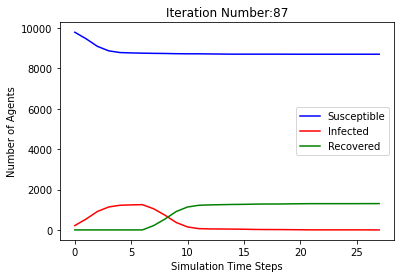

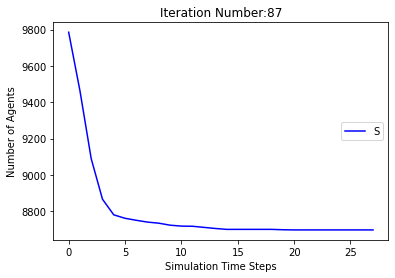

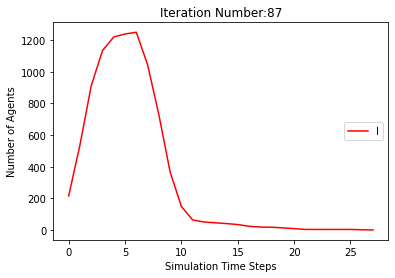

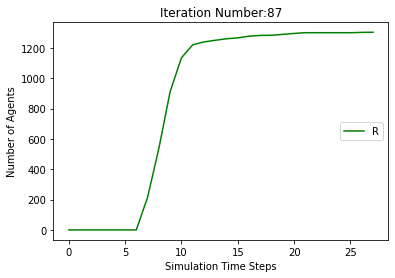

[9785, 9455, 9083, 8861, 8802, 8783, 8765, 8739, 8715, 8696, 8688, 8685, 8683, 8680, 8676, 8666, 8659, 8658, 8658, 8658, 8658, 8658, 8658, 8658, 8657, 8656, 8655, 8655, 8655, 8655, 8655, 8655, 8655, 8654, 8654, 8651, 8650, 8650, 8650, 8650, 8650, 8650, 8650, 8650]
[215, 545, 917, 1139, 1198, 1217, 1235, 1046, 740, 387, 173, 117, 100, 85, 63, 49, 37, 30, 27, 25, 22, 18, 8, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 4, 5, 5, 5, 5, 4, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 545, 917, 1139, 1198, 1217, 1235, 1261, 1285, 1304, 1312, 1315, 1317, 1320, 1324, 1334, 1341, 1342, 1342, 1342, 1342, 1342, 1342, 1342, 1343, 1344, 1345, 1345, 1345, 1345, 1345, 1345, 1345, 1346, 1346, 1349, 1350]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8

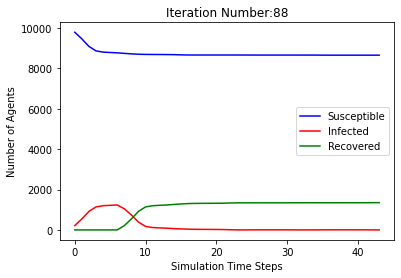

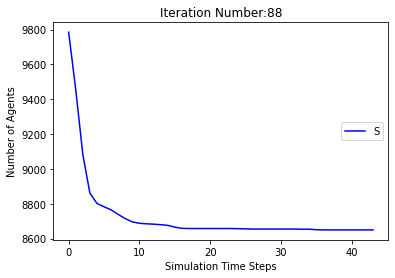

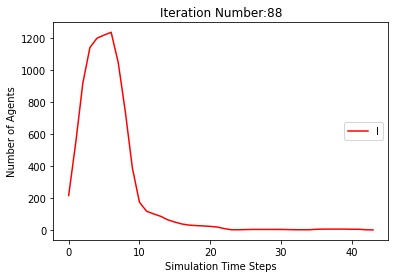

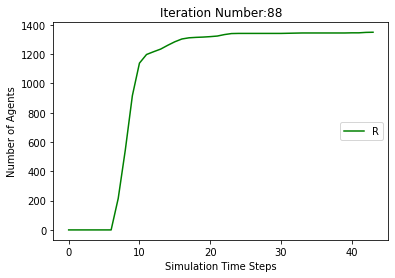

[9785, 9426, 9047, 8865, 8796, 8771, 8745, 8736, 8720, 8705, 8697, 8686, 8683, 8683, 8681, 8680, 8679, 8678, 8678, 8678, 8678, 8678, 8678, 8678, 8678]
[215, 574, 953, 1135, 1204, 1229, 1255, 1049, 706, 342, 168, 110, 88, 62, 55, 40, 26, 19, 8, 5, 5, 3, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 574, 953, 1135, 1204, 1229, 1255, 1264, 1280, 1295, 1303, 1314, 1317, 1317, 1319, 1320, 1321, 1322]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651,

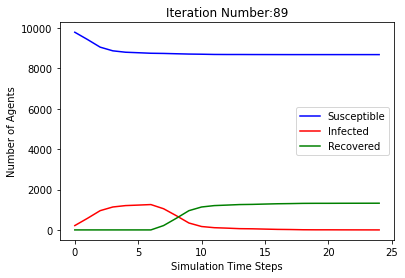

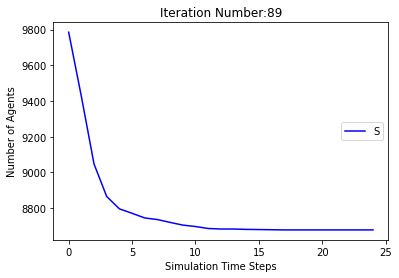

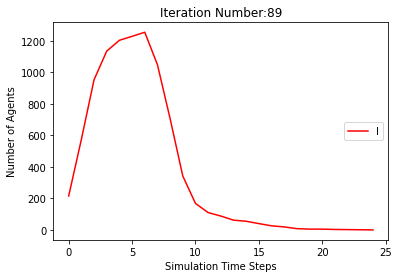

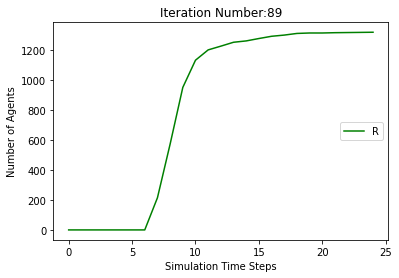

[9785, 9437, 9059, 8842, 8803, 8795, 8790, 8785, 8772, 8761, 8752, 8738, 8726, 8724, 8723, 8722, 8720, 8720, 8720, 8720, 8720, 8720, 8720, 8720]
[215, 563, 941, 1158, 1197, 1205, 1210, 1000, 665, 298, 90, 65, 69, 66, 62, 50, 41, 32, 18, 6, 4, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 563, 941, 1158, 1197, 1205, 1210, 1215, 1228, 1239, 1248, 1262, 1274, 1276, 1277, 1278, 1280]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 864

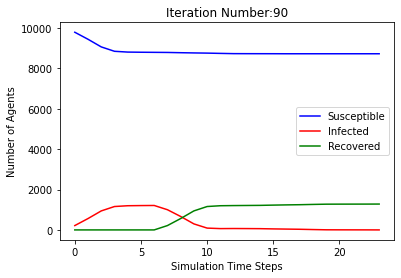

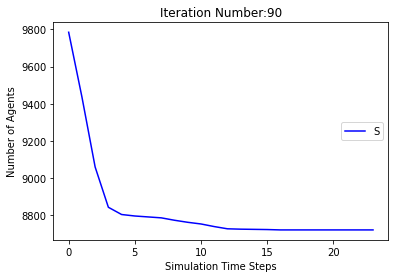

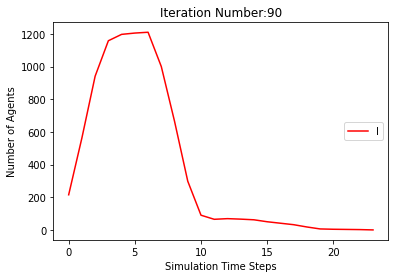

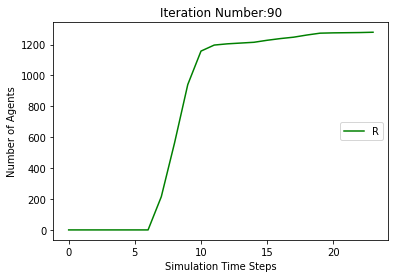

[9785, 9446, 9049, 8851, 8793, 8772, 8755, 8743, 8727, 8720, 8712, 8708, 8706, 8702, 8700, 8696, 8691, 8688, 8687, 8687, 8687, 8687, 8686, 8686, 8686, 8686, 8686, 8686, 8686, 8686]
[215, 554, 951, 1149, 1207, 1228, 1245, 1042, 719, 329, 139, 85, 66, 53, 43, 31, 29, 24, 21, 19, 15, 13, 10, 5, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 554, 951, 1149, 1207, 1228, 1245, 1257, 1273, 1280, 1288, 1292, 1294, 1298, 1300, 1304, 1309, 1312, 1313, 1313, 1313, 1313, 1314]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677],

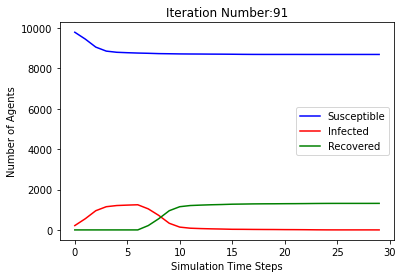

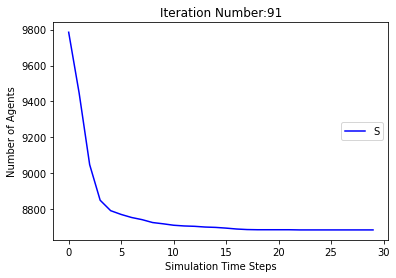

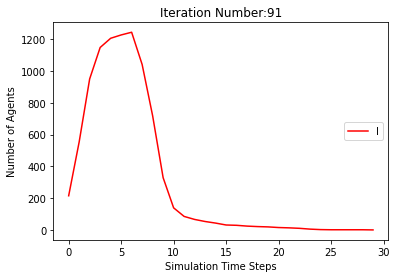

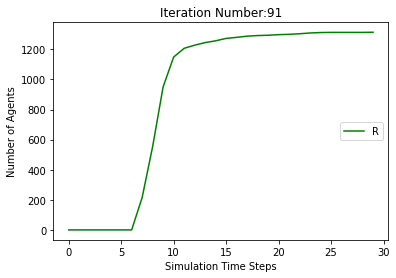

[9785, 9466, 9079, 8876, 8810, 8797, 8781, 8761, 8735, 8719, 8711, 8703, 8695, 8688, 8685, 8682, 8682, 8681, 8681, 8680, 8680, 8680, 8680, 8680, 8680, 8680, 8680]
[215, 534, 921, 1124, 1190, 1203, 1219, 1024, 731, 360, 165, 107, 102, 93, 76, 53, 37, 30, 22, 15, 8, 5, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 534, 921, 1124, 1190, 1203, 1219, 1239, 1265, 1281, 1289, 1297, 1305, 1312, 1315, 1318, 1318, 1319, 1319, 1320]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 87

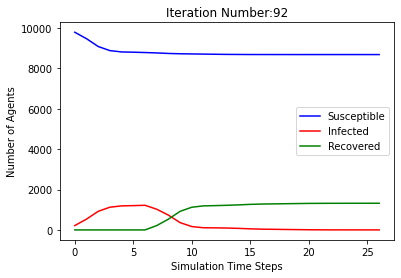

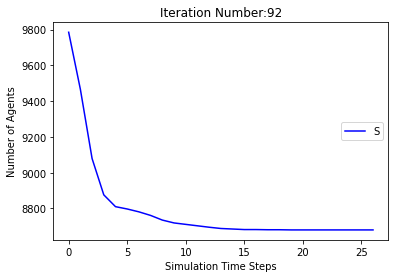

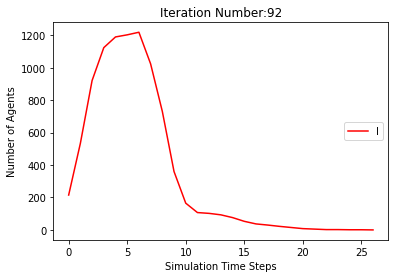

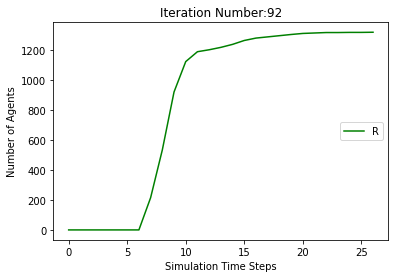

[9785, 9475, 9081, 8861, 8794, 8772, 8755, 8740, 8714, 8687, 8668, 8651, 8641, 8630, 8617, 8609, 8607, 8606, 8604, 8600, 8598, 8598, 8598, 8598, 8598, 8598, 8598, 8598]
[215, 525, 919, 1139, 1206, 1228, 1245, 1045, 761, 394, 193, 143, 131, 125, 123, 105, 80, 62, 47, 41, 32, 19, 11, 9, 8, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 525, 919, 1139, 1206, 1228, 1245, 1260, 1286, 1313, 1332, 1349, 1359, 1370, 1383, 1391, 1393, 1394, 1396, 1400, 1402]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824,

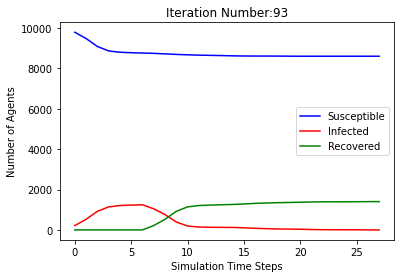

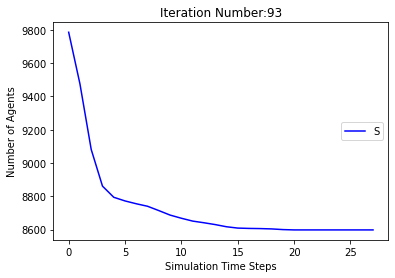

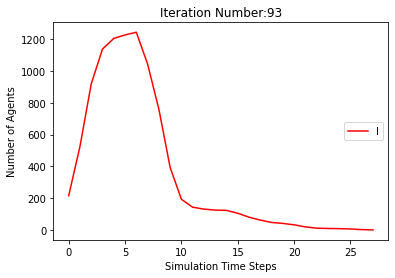

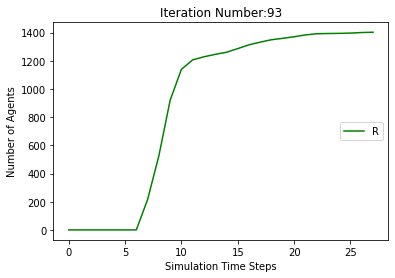

[9785, 9443, 9072, 8860, 8797, 8777, 8774, 8768, 8755, 8743, 8728, 8723, 8720, 8714, 8709, 8707, 8705, 8705, 8705, 8705, 8705, 8705, 8705, 8705]
[215, 557, 928, 1140, 1203, 1223, 1226, 1017, 688, 329, 132, 74, 57, 60, 59, 48, 38, 23, 18, 15, 9, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 557, 928, 1140, 1203, 1223, 1226, 1232, 1245, 1257, 1272, 1277, 1280, 1286, 1291, 1293, 1295]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8

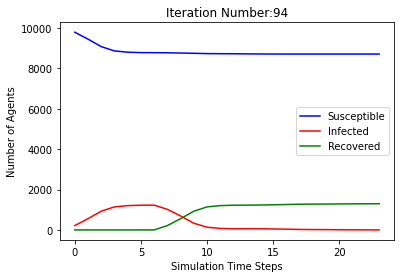

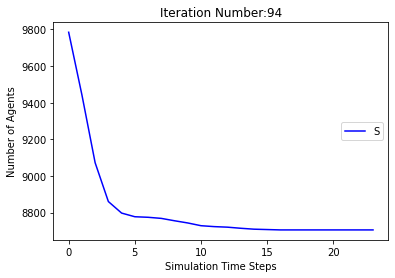

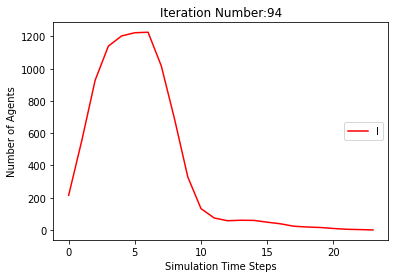

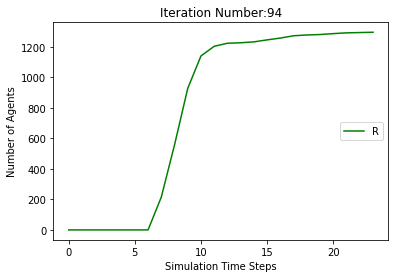

[9785, 9459, 9077, 8868, 8792, 8764, 8748, 8732, 8715, 8708, 8699, 8690, 8680, 8675, 8673, 8671, 8667, 8664, 8664, 8663, 8662, 8662, 8662, 8662, 8662, 8662, 8662, 8662]
[215, 541, 923, 1132, 1208, 1236, 1252, 1053, 744, 369, 169, 102, 84, 73, 59, 44, 41, 35, 26, 17, 13, 11, 9, 5, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 541, 923, 1132, 1208, 1236, 1252, 1268, 1285, 1292, 1301, 1310, 1320, 1325, 1327, 1329, 1333, 1336, 1336, 1337, 1338]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773

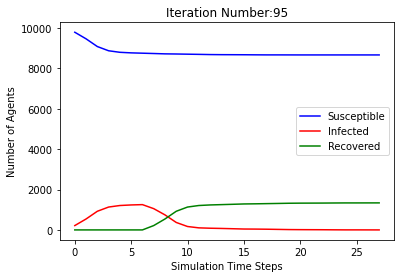

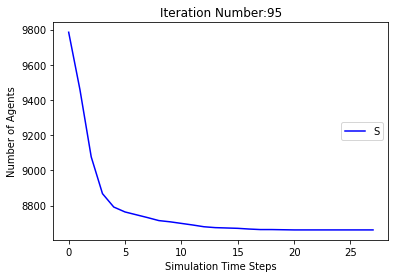

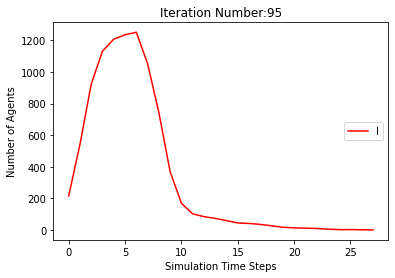

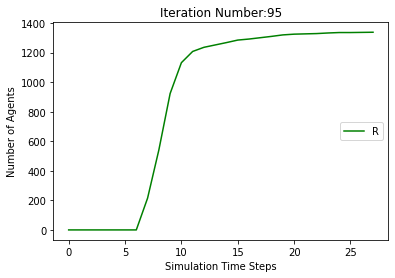

[9785, 9436, 9054, 8839, 8785, 8762, 8744, 8722, 8709, 8693, 8683, 8676, 8671, 8667, 8667, 8667, 8667, 8666, 8666, 8666, 8666, 8666, 8666, 8666, 8666]
[215, 564, 946, 1161, 1215, 1238, 1256, 1063, 727, 361, 156, 109, 91, 77, 55, 42, 26, 17, 10, 5, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 564, 946, 1161, 1215, 1238, 1256, 1278, 1291, 1307, 1317, 1324, 1329, 1333, 1333, 1333, 1333, 1334]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651

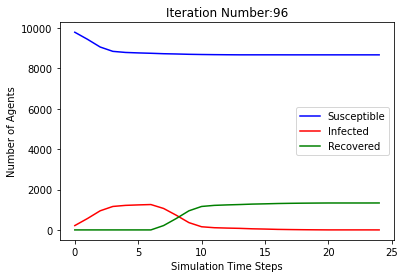

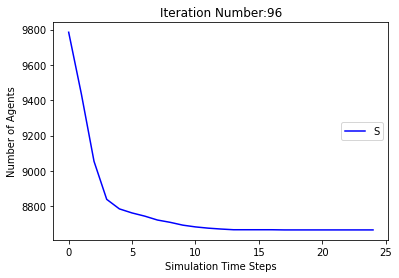

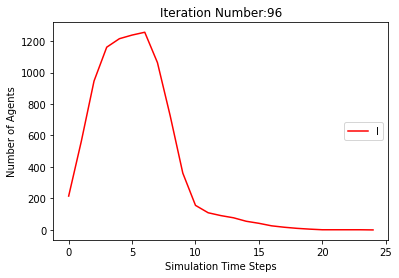

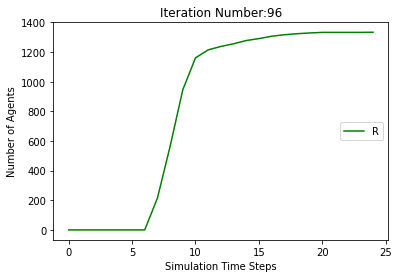

[9785, 9451, 9049, 8844, 8804, 8780, 8757, 8748, 8733, 8713, 8698, 8683, 8675, 8672, 8671, 8666, 8660, 8658, 8657, 8657, 8656, 8656, 8656, 8656, 8656, 8656, 8656, 8656]
[215, 549, 951, 1156, 1196, 1220, 1243, 1037, 718, 336, 146, 121, 105, 85, 77, 67, 53, 40, 26, 18, 16, 15, 10, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 549, 951, 1156, 1196, 1220, 1243, 1252, 1267, 1287, 1302, 1317, 1325, 1328, 1329, 1334, 1340, 1342, 1343, 1343, 1344]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 87

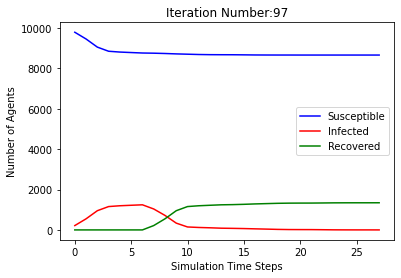

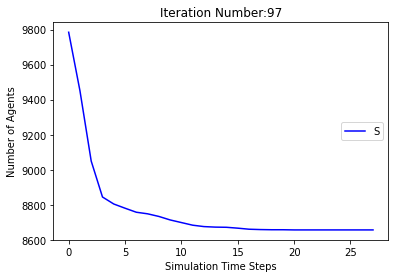

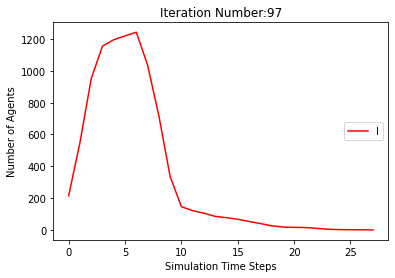

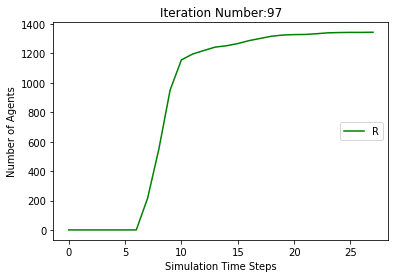

[9785, 9444, 9063, 8867, 8806, 8785, 8770, 8755, 8735, 8723, 8711, 8703, 8698, 8696, 8696, 8693, 8691, 8688, 8685, 8684, 8683, 8683, 8683, 8683, 8683, 8683, 8683, 8683]
[215, 556, 937, 1133, 1194, 1215, 1230, 1030, 709, 340, 156, 103, 87, 74, 59, 42, 32, 23, 18, 14, 13, 13, 10, 8, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 556, 937, 1133, 1194, 1215, 1230, 1245, 1265, 1277, 1289, 1297, 1302, 1304, 1304, 1307, 1309, 1312, 1315, 1316, 1317]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 877

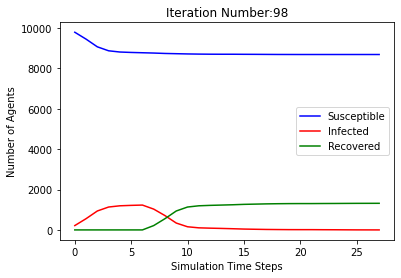

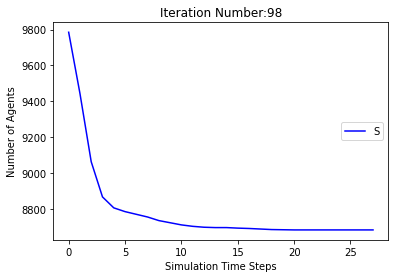

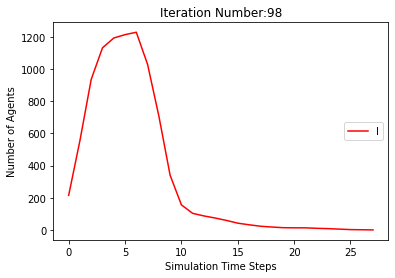

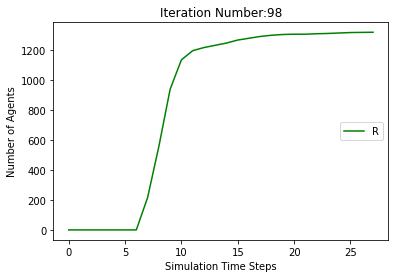

[9785, 9469, 9084, 8884, 8814, 8792, 8769, 8757, 8748, 8738, 8735, 8723, 8715, 8711, 8709, 8709, 8709, 8709, 8709, 8709, 8709, 8709]
[215, 531, 916, 1116, 1186, 1208, 1231, 1028, 721, 346, 149, 91, 77, 58, 48, 39, 29, 26, 14, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 531, 916, 1116, 1186, 1208, 1231, 1243, 1252, 1262, 1265, 1277, 1285, 1289, 1291]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9418, 9021, 8824, 8773, 8754, 8743, 8721, 8704, 8684, 8670, 8660, 8651, 8646, 8642, 8641, 8640, 8640, 8640, 8640, 86

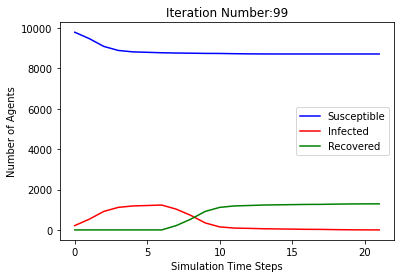

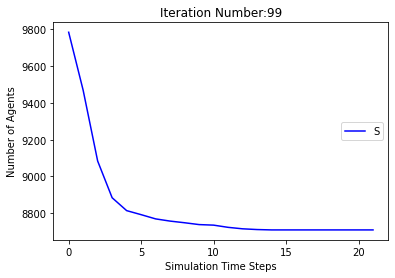

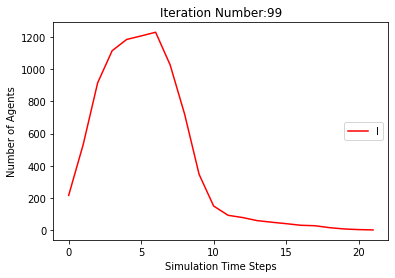

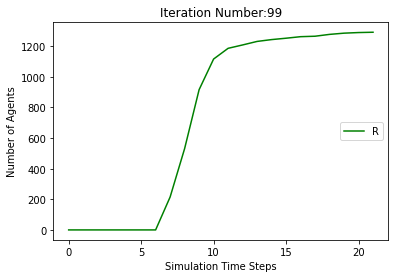

[9785, 9474, 9097, 8872, 8804, 8774, 8750, 8731, 8712, 8692, 8671, 8665, 8661, 8655, 8650, 8647, 8647, 8647, 8646, 8645, 8645, 8645, 8645, 8644, 8644, 8644, 8644, 8644, 8644, 8644, 8644]
[215, 526, 903, 1128, 1196, 1226, 1250, 1054, 762, 405, 201, 139, 113, 95, 81, 65, 45, 24, 19, 16, 10, 5, 2, 3, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 215, 526, 903, 1128, 1196, 1226, 1250, 1269, 1288, 1308, 1329, 1335, 1339, 1345, 1350, 1353, 1353, 1353, 1354, 1355, 1355, 1355, 1355, 1356]
[[], [9785, 9437, 9070, 8862, 8800, 8789, 8782, 8765, 8742, 8724, 8714, 8706, 8700, 8694, 8690, 8686, 8685, 8684, 8684, 8684, 8684, 8683, 8682, 8680, 8677, 8675, 8673, 8673, 8673, 8673, 8673, 8673, 8673, 8673], [9785, 9435, 9036, 8859, 8802, 8780, 8767, 8745, 8730, 8718, 8710, 8697, 8684, 8683, 8683, 8681, 8681, 8681, 8677, 8677, 8677, 8677, 8677, 8677, 8677, 8677], [9785, 9439, 9041, 8854, 8778, 8750, 8731, 8723, 8716, 8707, 8698, 8688, 8682, 8680, 8679, 8678, 8678, 8678, 8678, 8677, 8677, 8677, 8677, 8677, 867

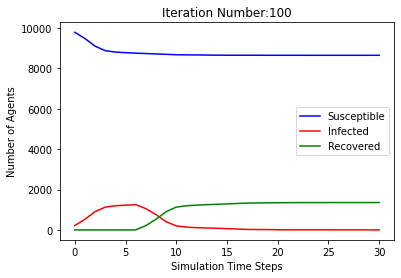

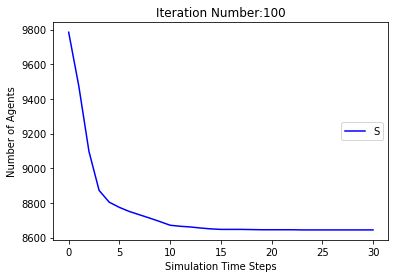

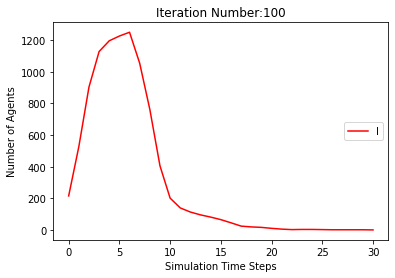

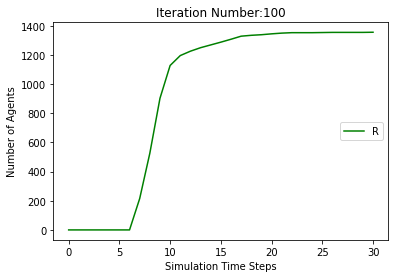

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

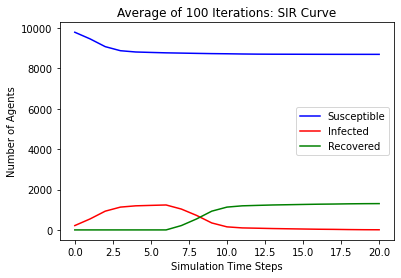

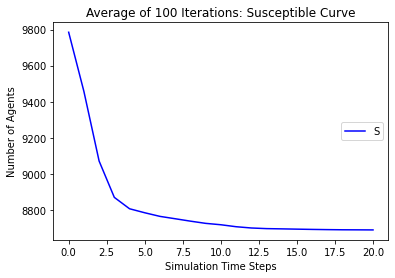

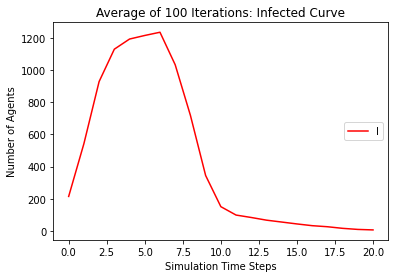

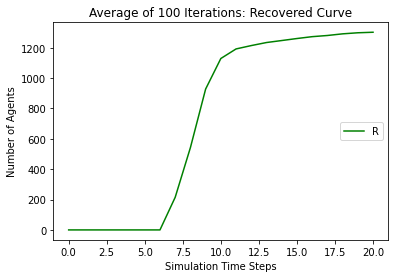

In [14]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,100):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
